# Figure 7: AUC analysis to separate single neuronal tuning properties

This notebook contains a lot of information related to the AUC analysis, the main figure 6, and related supplementary figures.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import pandas as pd
import pickle
from PIL import Image

import local_env
import VideoAnalysisUtils.functions as func
import VideoAnalysisUtils.plotting_utils as plt_utils
import VideoAnalysisUtils.plot_style as style

/home/kurgyis/Research/MapVideoAnalysis/python38_venv/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
figfolder = '../figs/manuscript_drafts/'
os.makedirs(figfolder, exist_ok=True)

## Main figure

In [3]:
fig6 = plt_utils.Figure6()
fig6.load_data()
fig6.view_to_cmap['motor fraction'] = 'Oranges'
fig6.view_to_cmap['trial fraction'] = 'Purples'

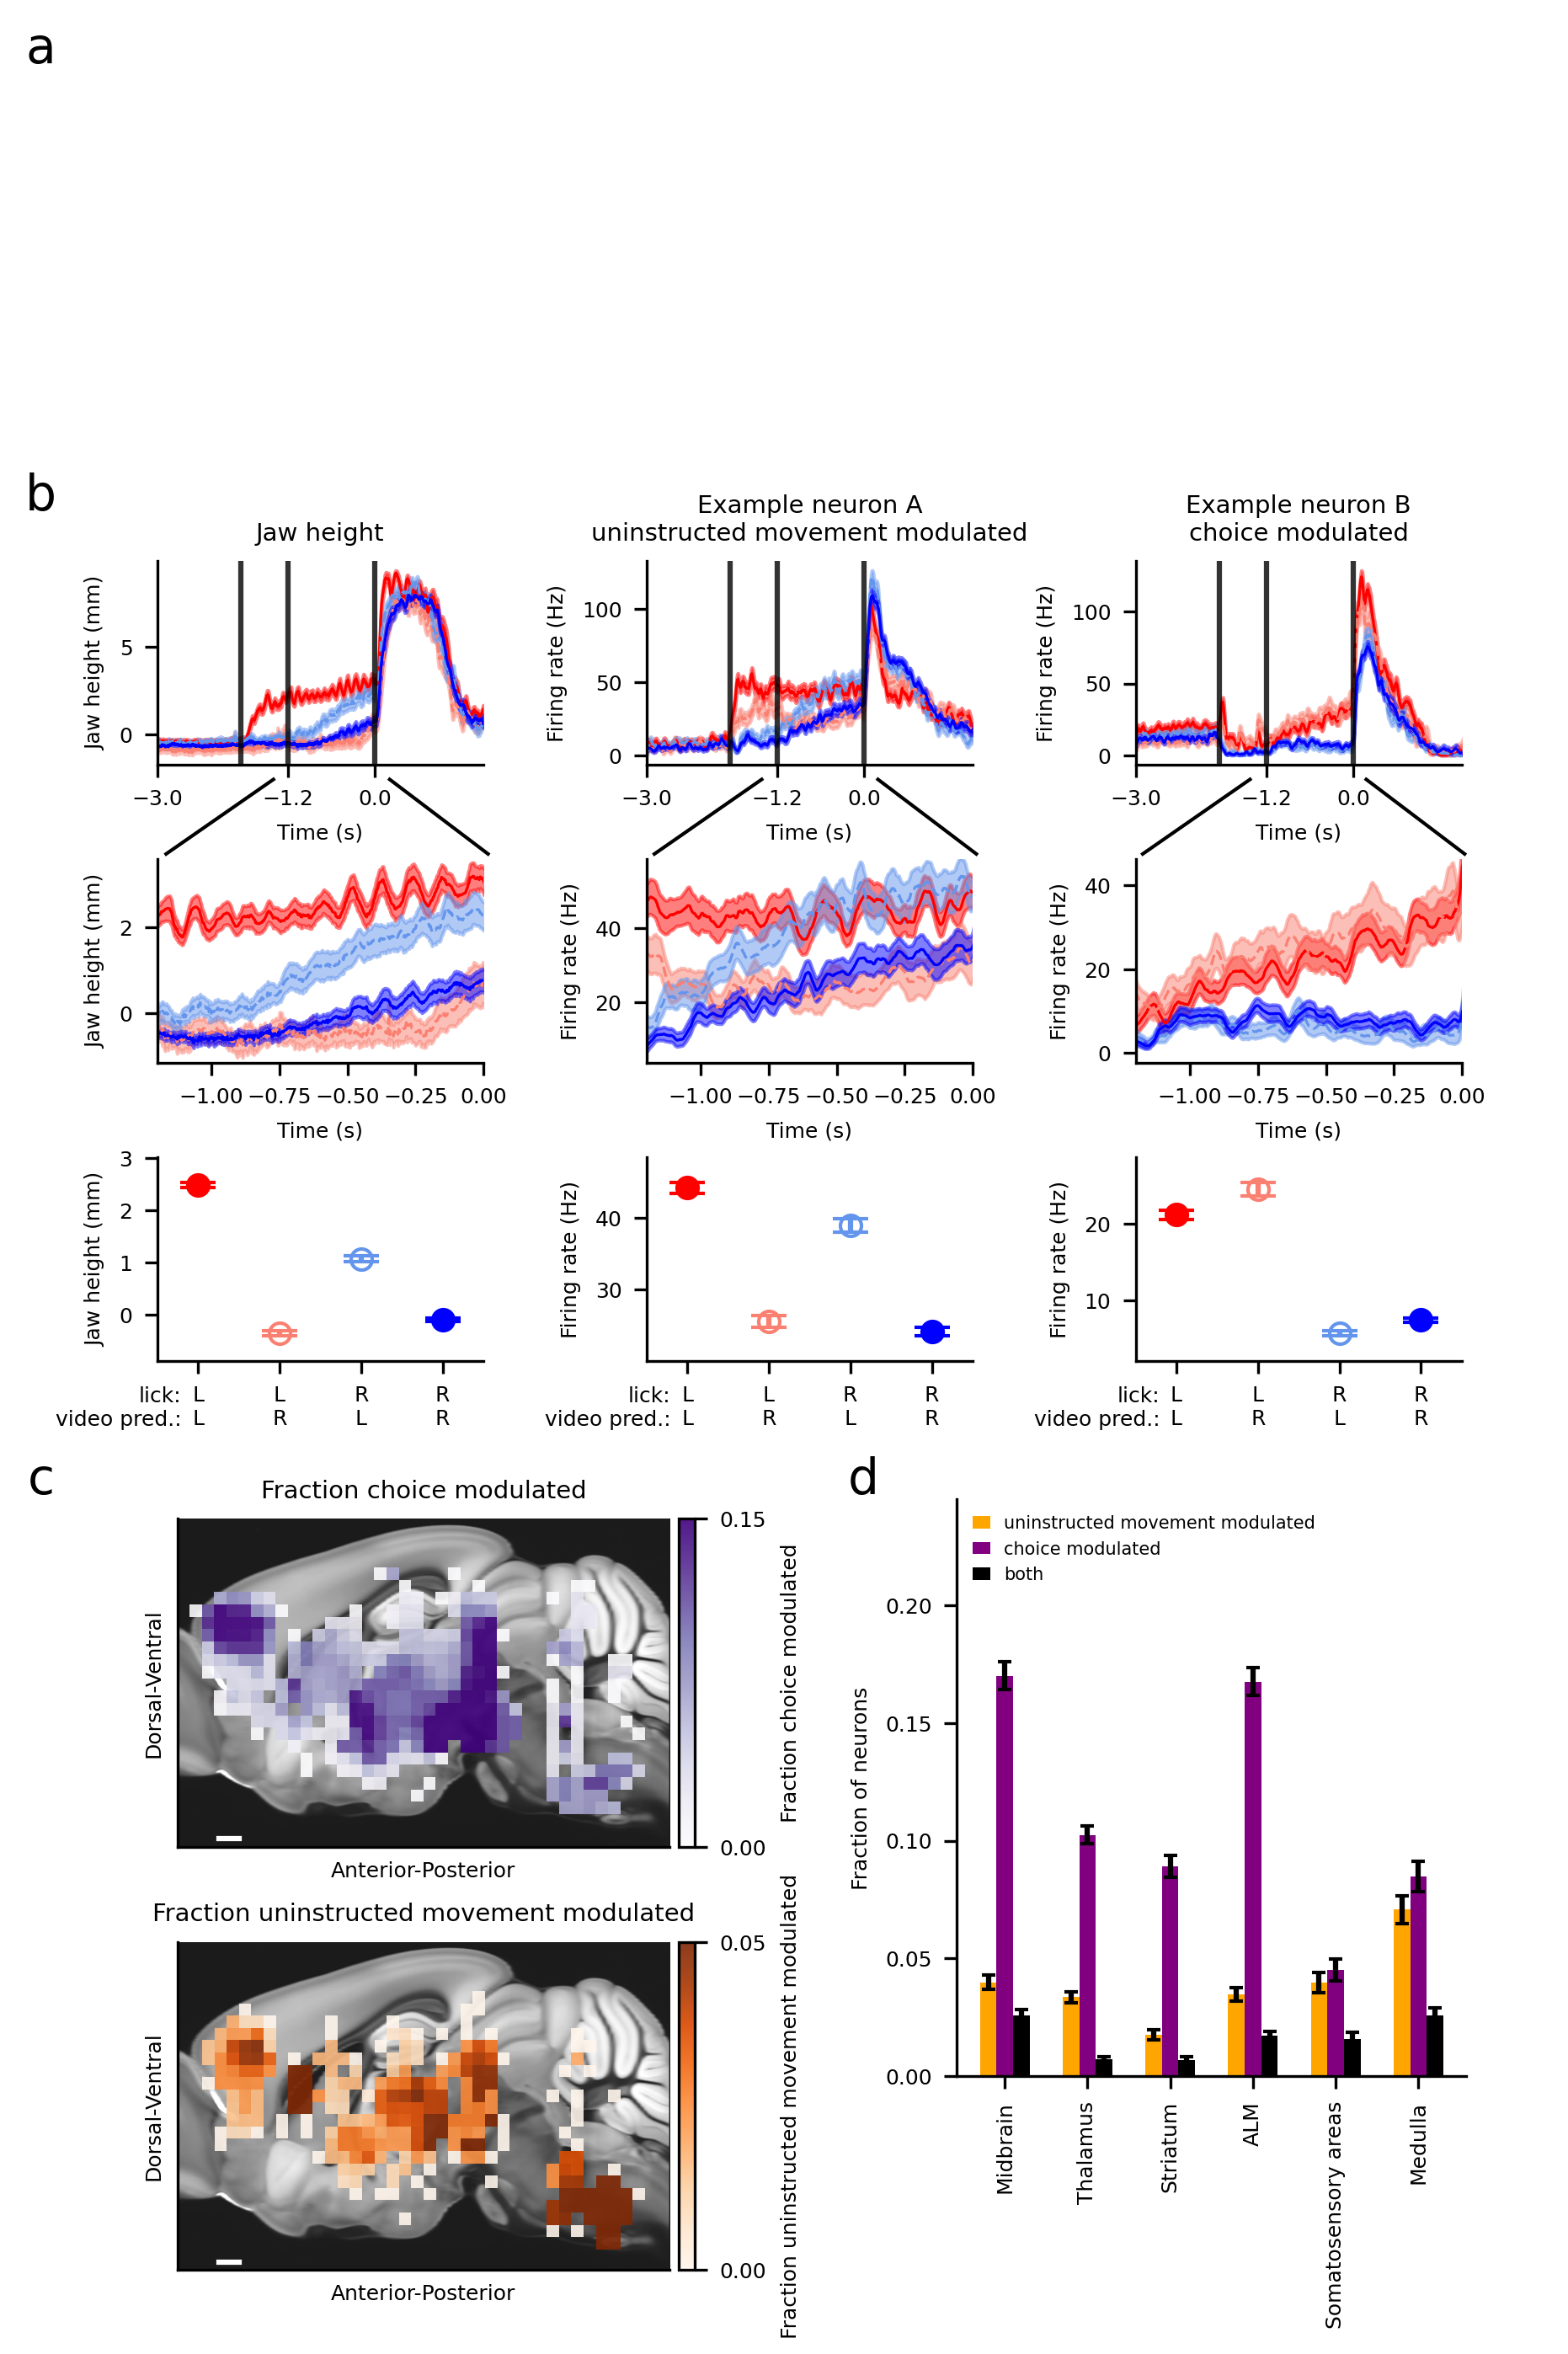

In [4]:
plt.rcParams['figure.figsize'][1] = style.fig_w_max * 20 / 12

fig = plt.figure()
gs = gridspec.GridSpec(6, 3, figure=fig)

ax1 = fig.add_subplot(gs[0:1, 0:3])
ax1.axis('off')

marker_axes = []

y0_for_markers = [0.66,0.56,0.46]

for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(gs[i+1, j])
        pos = ax.get_position()
        ax.set_position([pos.x0, y0_for_markers[i] , pos.width*0.8, pos.height * 0.62])
        marker_axes.append(ax)

ax3 = fig.add_subplot(gs[4:6, 2:3])
heatmap_axes = []

for i in range(2):
    ax = fig.add_subplot(gs[4+i, 0:2])
    heatmap_axes.append(ax)

data_types = ['marker', 'neuron', 'neuron']
ids = [1,7,8]
view_types = ['full', 'delay', 'delay_avg']

for i in range(3):
    for j in range(3):
        fig6.plot_single_session_example(marker_axes[i+3*j], data_type = data_types[i], view_type = view_types[j], id = ids[i])

fig6.plot_modulated_fraction_area_barplot(ax3)
pos3 = ax3.get_position()
ax3.set_position([pos3.x0-0.1, pos3.y0+0.11, pos3.width*1.25, pos3.height*0.8])


voxel_size = 300
filter_size = 3
proj_ax = 2
cbar_fraction = 0.03
alpha_anatomy = 0.9
alpha_heatmap = 0.7

xlims = [[1500,13500], [900,10800]]
ylims = [[8000,0],[1500,13500]]
res_image = 20

dv_slices = [slice(int(ylims[0][1] / res_image), int(ylims[0][0] / res_image)),
             210]
ml_slices = [250,
             slice(int(xlims[1][0] / res_image), int(xlims[1][1] / res_image))]
ap_slices = [slice(int(xlims[0][0] / res_image), int(xlims[0][1] / res_image)),
             slice(int(ylims[1][0] / res_image), int(ylims[1][1] / res_image))]

_,ccf_coords, _ = fig6._get_misc_arrays()
motor_type_auc = fig6.auc_delay_data['motor_type_auc_test']
trial_type_auc = fig6.auc_delay_data['trial_type_auc_test']

masks = fig6._get_auc_type_masks(cutoff = 0.65)
motor_inds = np.where(masks[0] == True)[0]
trial_inds = np.where(masks[1] == True)[0]

fig6.plot_saggital_heatmap(fig = fig, ax = heatmap_axes[0], 
                           view = 'trial fraction', 
                           cbar_x0_shift=-0.2,
                           cbar_y0_shift=0.055,
                           )
fig6.plot_saggital_heatmap(fig = fig, ax = heatmap_axes[1], 
                           view = 'motor fraction', 
                           cbar_x0_shift=-0.2,
                           cbar_y0_shift=0.045)

for i in range(2):
    pos = heatmap_axes[i].get_position()
    heatmap_axes[i].set_position([pos.x0 -0.2,pos.y0 + 0.045 + (0.01*(i==0)), pos.width, pos.height])
    heatmap_axes[i].set_xlabel('Anterior-Posterior')
    heatmap_axes[i].set_ylabel('Dorsal-Ventral')

fig.text(0.06, 0.90, 'a', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.75, 'b', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.42, 'c', ha='center', va='center', fontsize=14)
fig.text(0.52, 0.42, 'd', ha='center', va='center', fontsize=14)

line1 = plt.Line2D([0.19, 0.130], [0.655, 0.63], transform=fig.transFigure, color="black", lw=1)
line2 = plt.Line2D([0.255, 0.31], [0.655, 0.63], transform=fig.transFigure, color="black", lw=1)
delta = 0.273
line3 = plt.Line2D([0.19 + delta, 0.130 + delta], [0.655, 0.63], transform=fig.transFigure, color="black", lw=1)
line4 = plt.Line2D([0.255 + delta, 0.31 + delta], [0.655, 0.63], transform=fig.transFigure, color="black", lw=1)
line5 = plt.Line2D([0.19 + 2*delta, 0.13 + 2*delta], [0.655, 0.63], transform=fig.transFigure, color="black", lw=1)
line6 = plt.Line2D([0.255 + 2*delta, 0.31 + 2*delta], [0.655, 0.63], transform=fig.transFigure, color="black", lw=1)
fig.lines.extend([line1, line2, line3, line4, line5, line6])

#plt.savefig(figfolder + 'figure6_draft_v6.png', dpi = 300, bbox_inches = 'tight')

## Supplementary figures

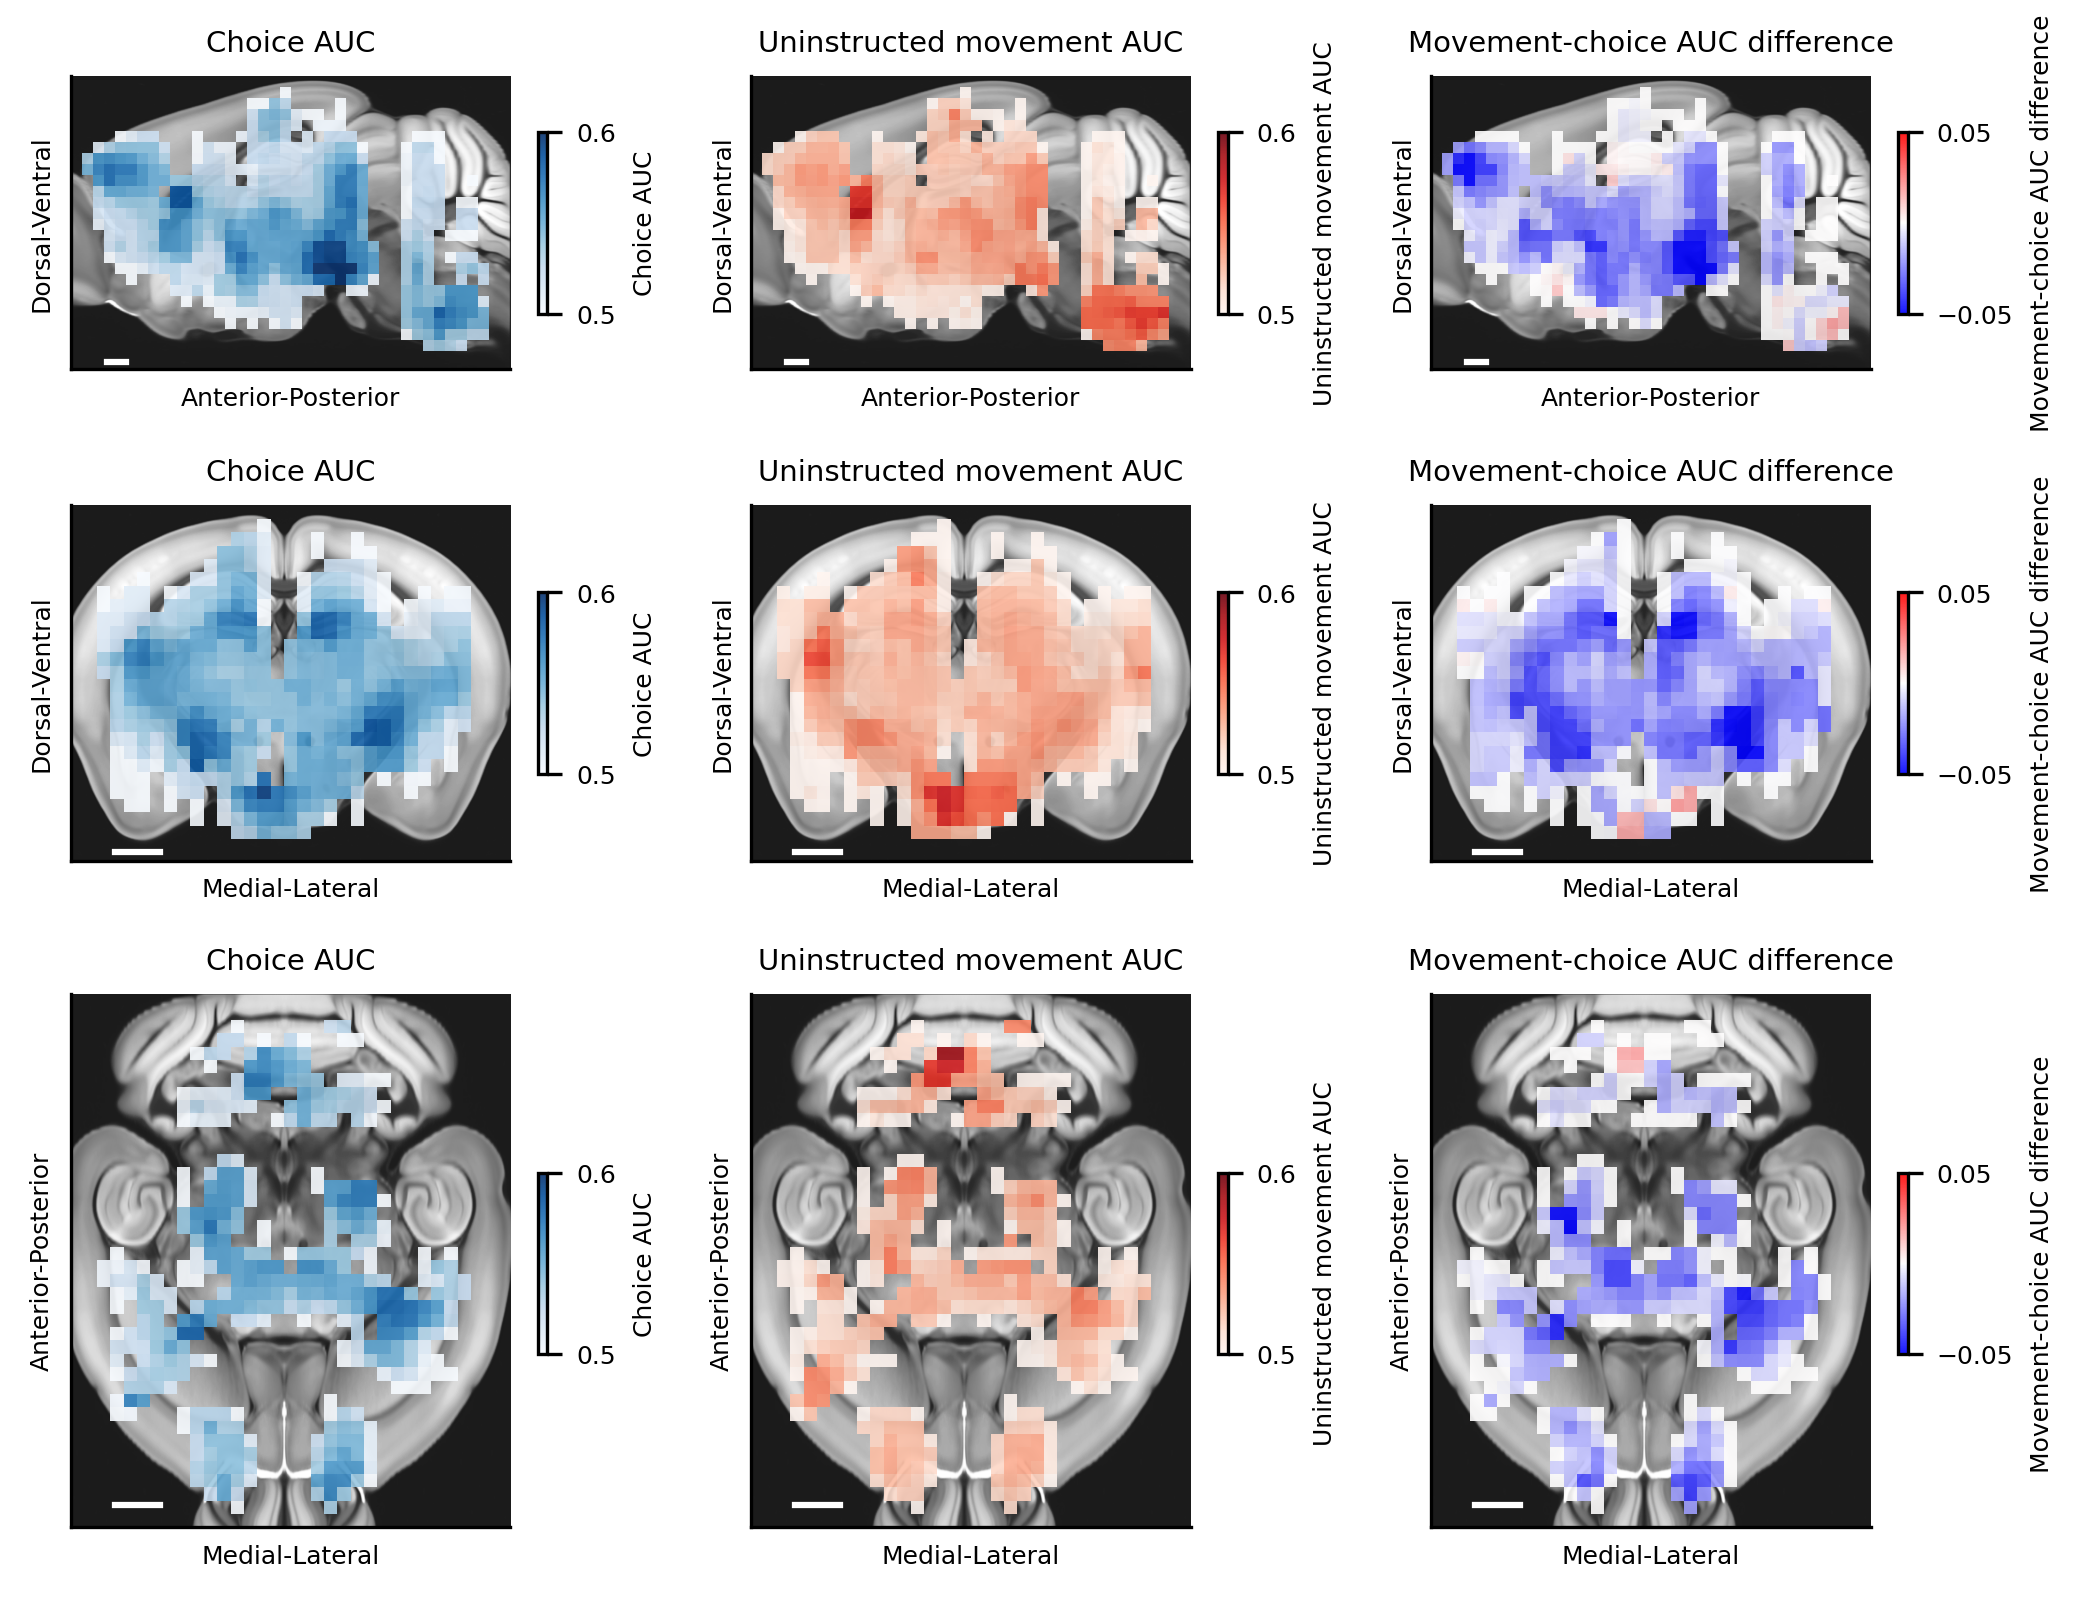

In [5]:
f, axs = plt.subplots(3,3, figsize = (7.8,8))
f.subplots_adjust(wspace = 0.5,)

fig6.view_to_vlim['motor-trial average'] = [-0.05, 0.05]
fig6.view_to_vlim['motor average'] = [0.5, 0.6]
fig6.view_to_vlim['trial average'] = [0.5, 0.6]

axs = axs.flatten()

coronal_shift = 0.08

views = ['trial average', 'motor average', 'motor-trial average']

for i in range(3):
    fig6.plot_saggital_heatmap(fig = f, ax = axs[i], view = views[i], cbar_x0_shift=0.01, cbar_y0_shift=0.0)
    axs[i].set_xlabel('Anterior-Posterior')
    axs[i].set_ylabel('Dorsal-Ventral')

    fig6.plot_coronal_heatmap(fig = f, ax = axs[i+3], view = views[i], cbar_x0_shift=0.01, cbar_y0_shift=coronal_shift)
    axs[i+3].set_xlabel('Medial-Lateral')
    axs[i+3].set_ylabel('Dorsal-Ventral')

    fig6.plot_horizontal_heatmap(fig = f, ax = axs[i+6], view = views[i], cbar_x0_shift=0.01, cbar_y0_shift=0.11)
    axs[i+6].set_xlabel('Medial-Lateral')
    axs[i+6].set_ylabel('Anterior-Posterior')

for ii in range(3,6):
    pos = axs[ii].get_position()
    axs[ii].set_position([pos.x0, pos.y0 +coronal_shift, pos.width, pos.height])

for ii in range(6,9):
    pos = axs[ii].get_position()
    axs[ii].set_position([pos.x0, pos.y0 , pos.width, pos.height*2])

#plt.savefig('../figs/supplementary_figs/AUC_spatial_uniformity_all_views.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.close()


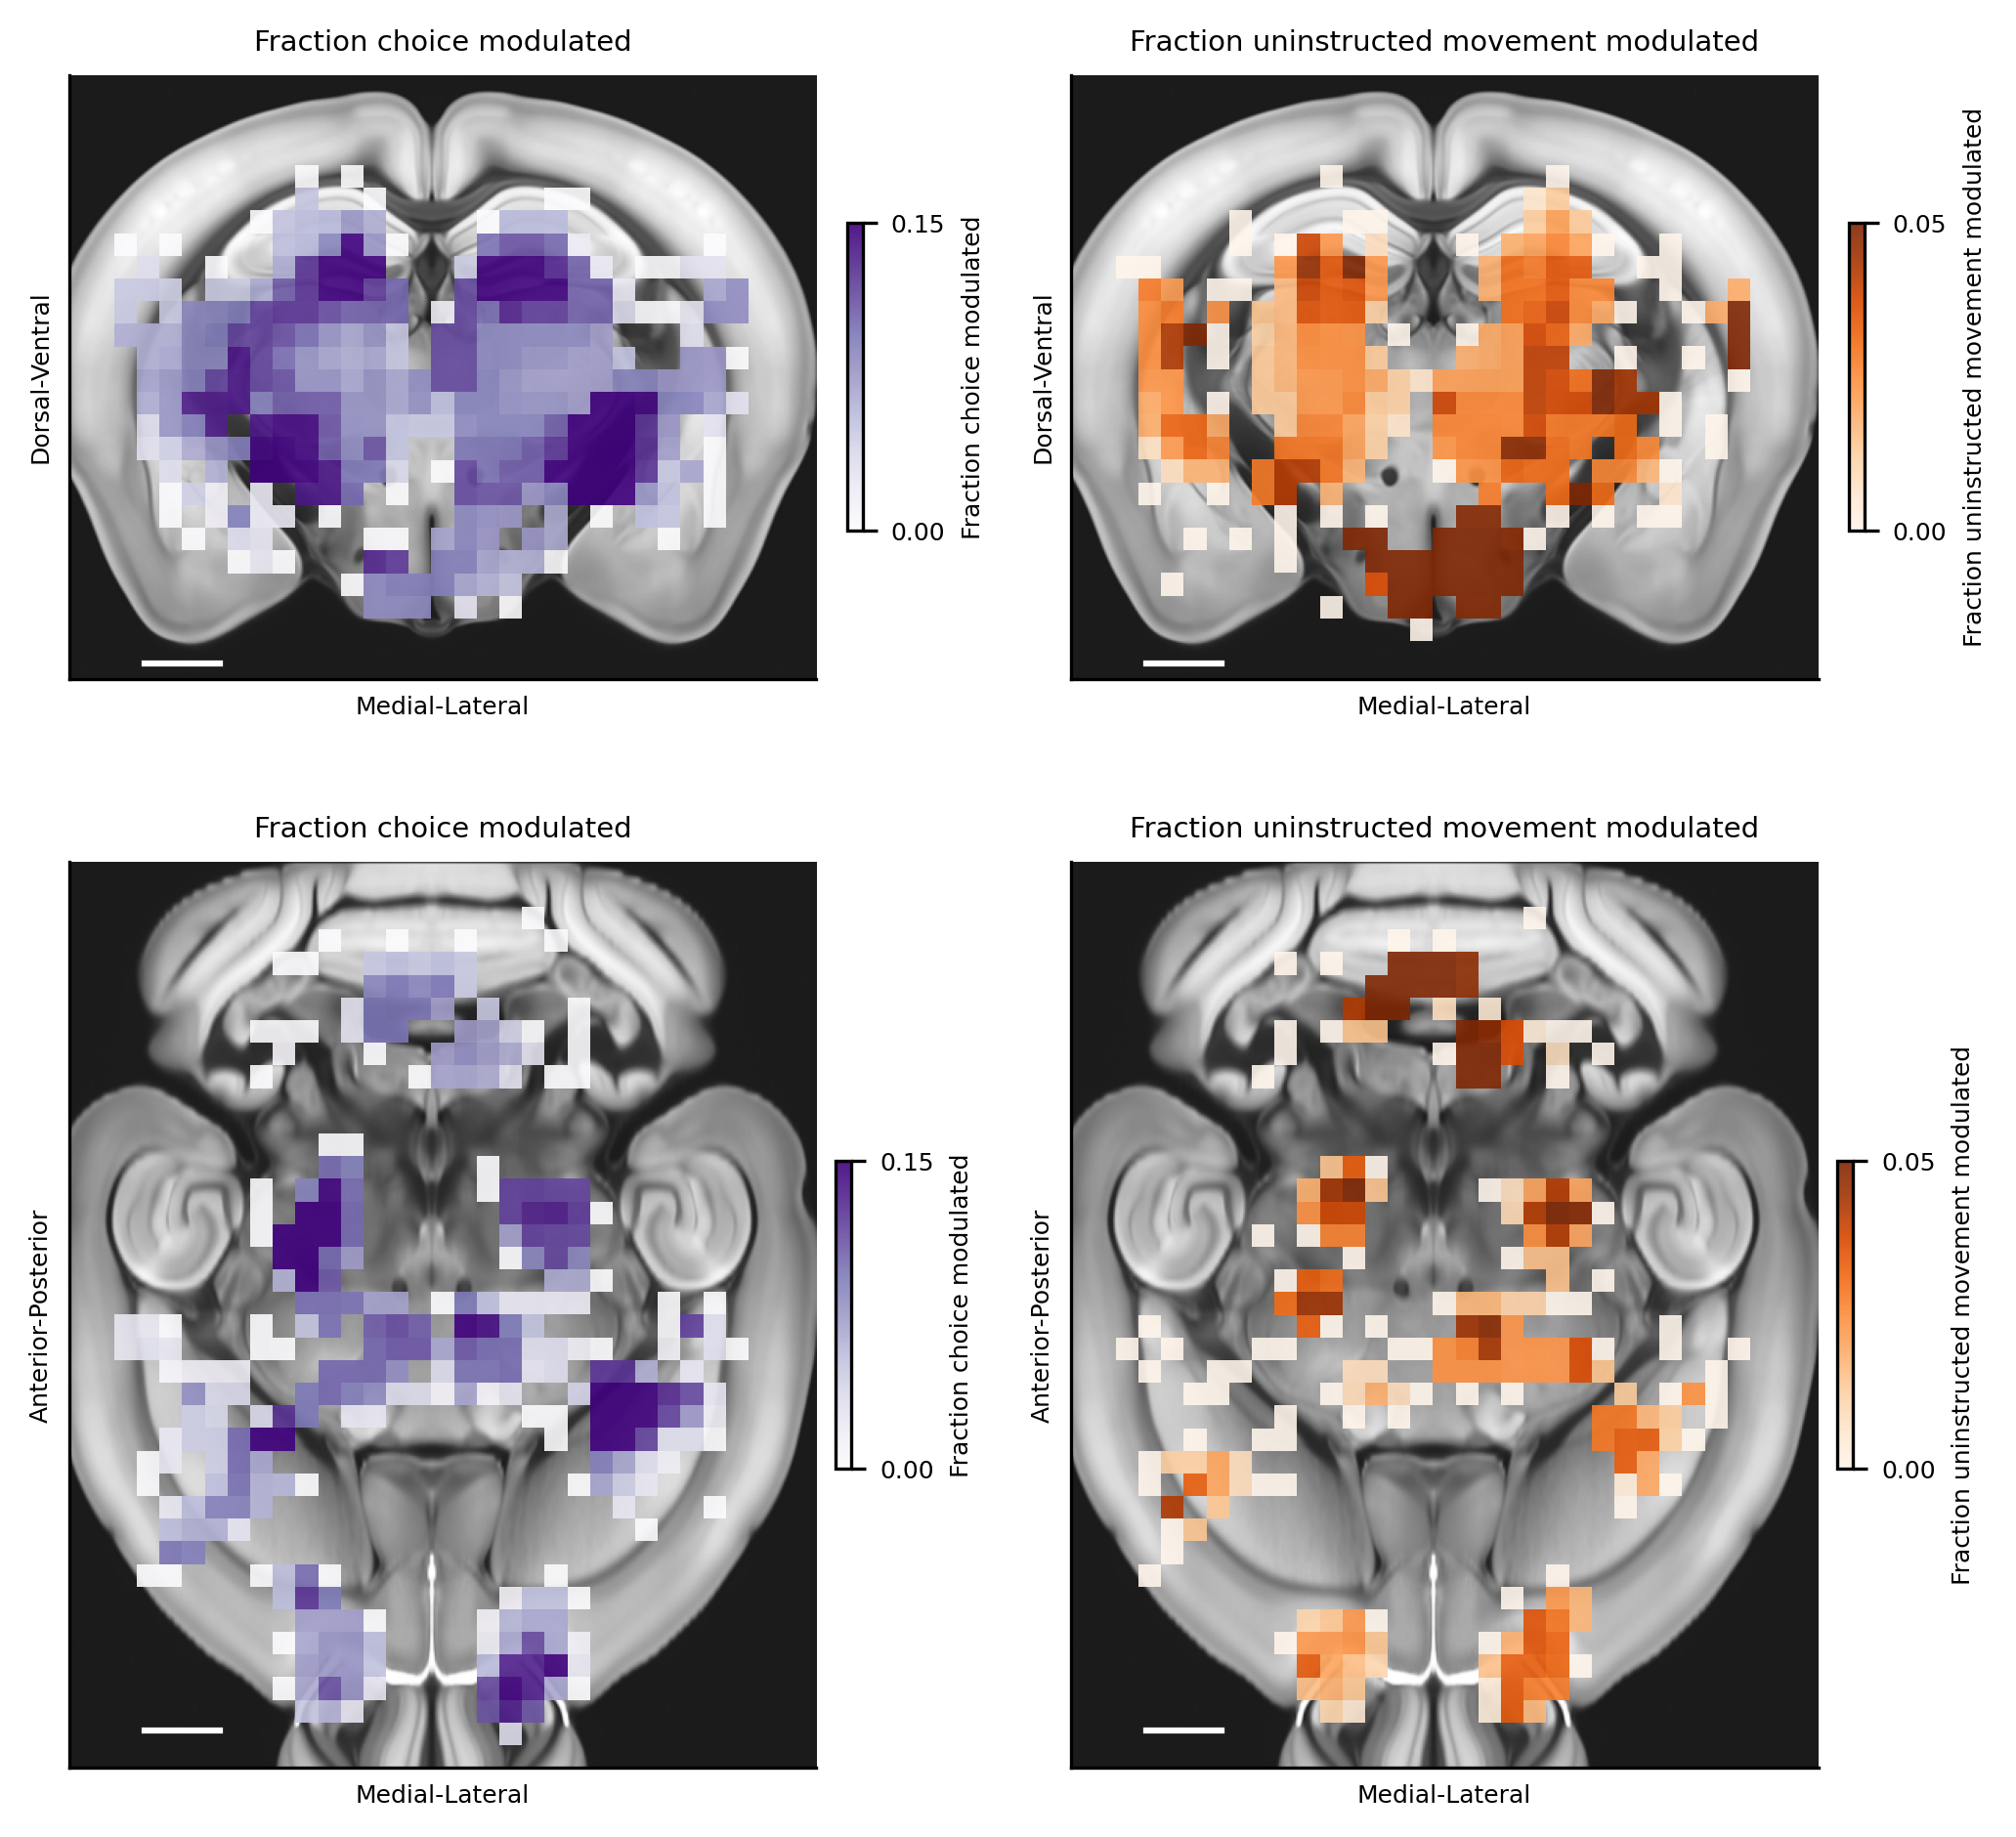

In [6]:
fig6.plot_other_views_supplementary()
#plt.savefig('../figs/supplementary_figs/AUC_other_views_fraction_trial_motor_v2.png', dpi = 300, bbox_inches = 'tight')

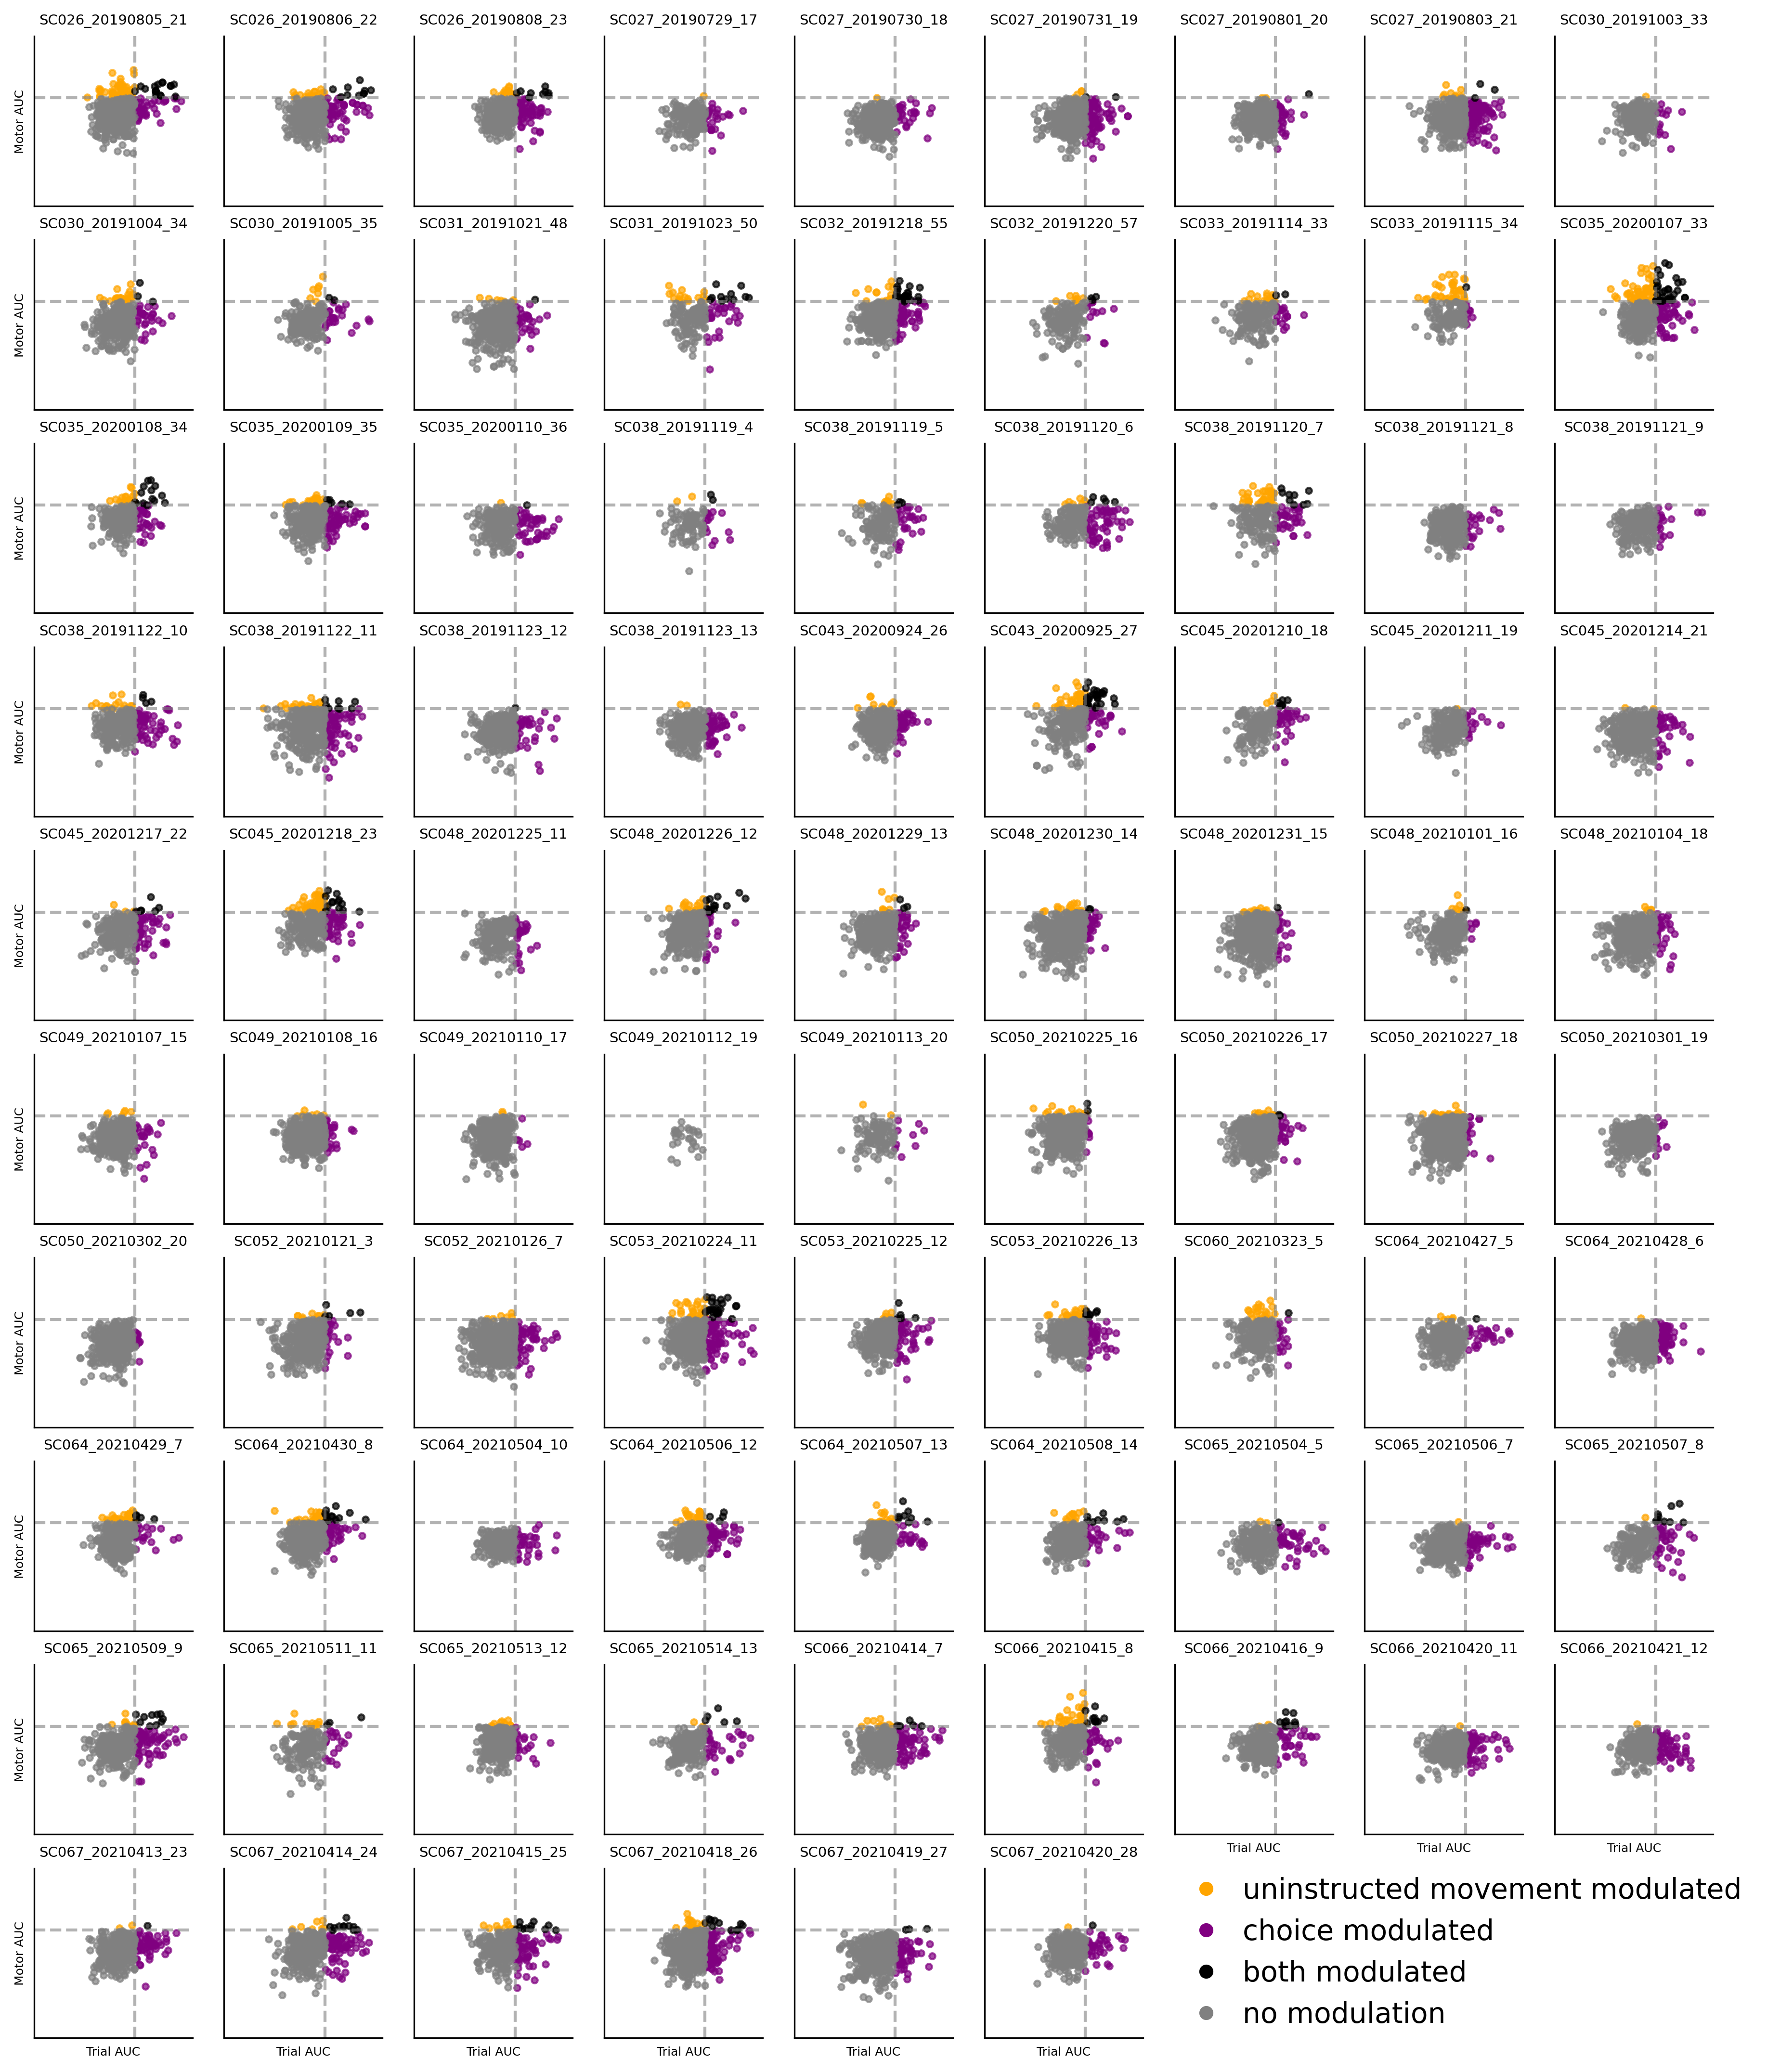

In [7]:
fig6.plot_single_session_AUC_scatters()
#plt.savefig('../figs/supplementary_figs/AUC_single_session_scatter.png', dpi = 300, bbox_inches = 'tight')

In [8]:
ccfs, coords, alm_inds = fig6._get_misc_arrays()
area_inds = {area: func.get_single_area_inds(area, fig6.allen_hierarchy, ccfs, alm_inds) for area in fig6.areas}

masks = fig6._get_auc_type_masks() #motor, trial, both, none
cols = ['orange', 'purple', 'k', 'gray']
names = ['motor', 'trial', 'both', 'none']

Text(0.52, 0.5, 'c')

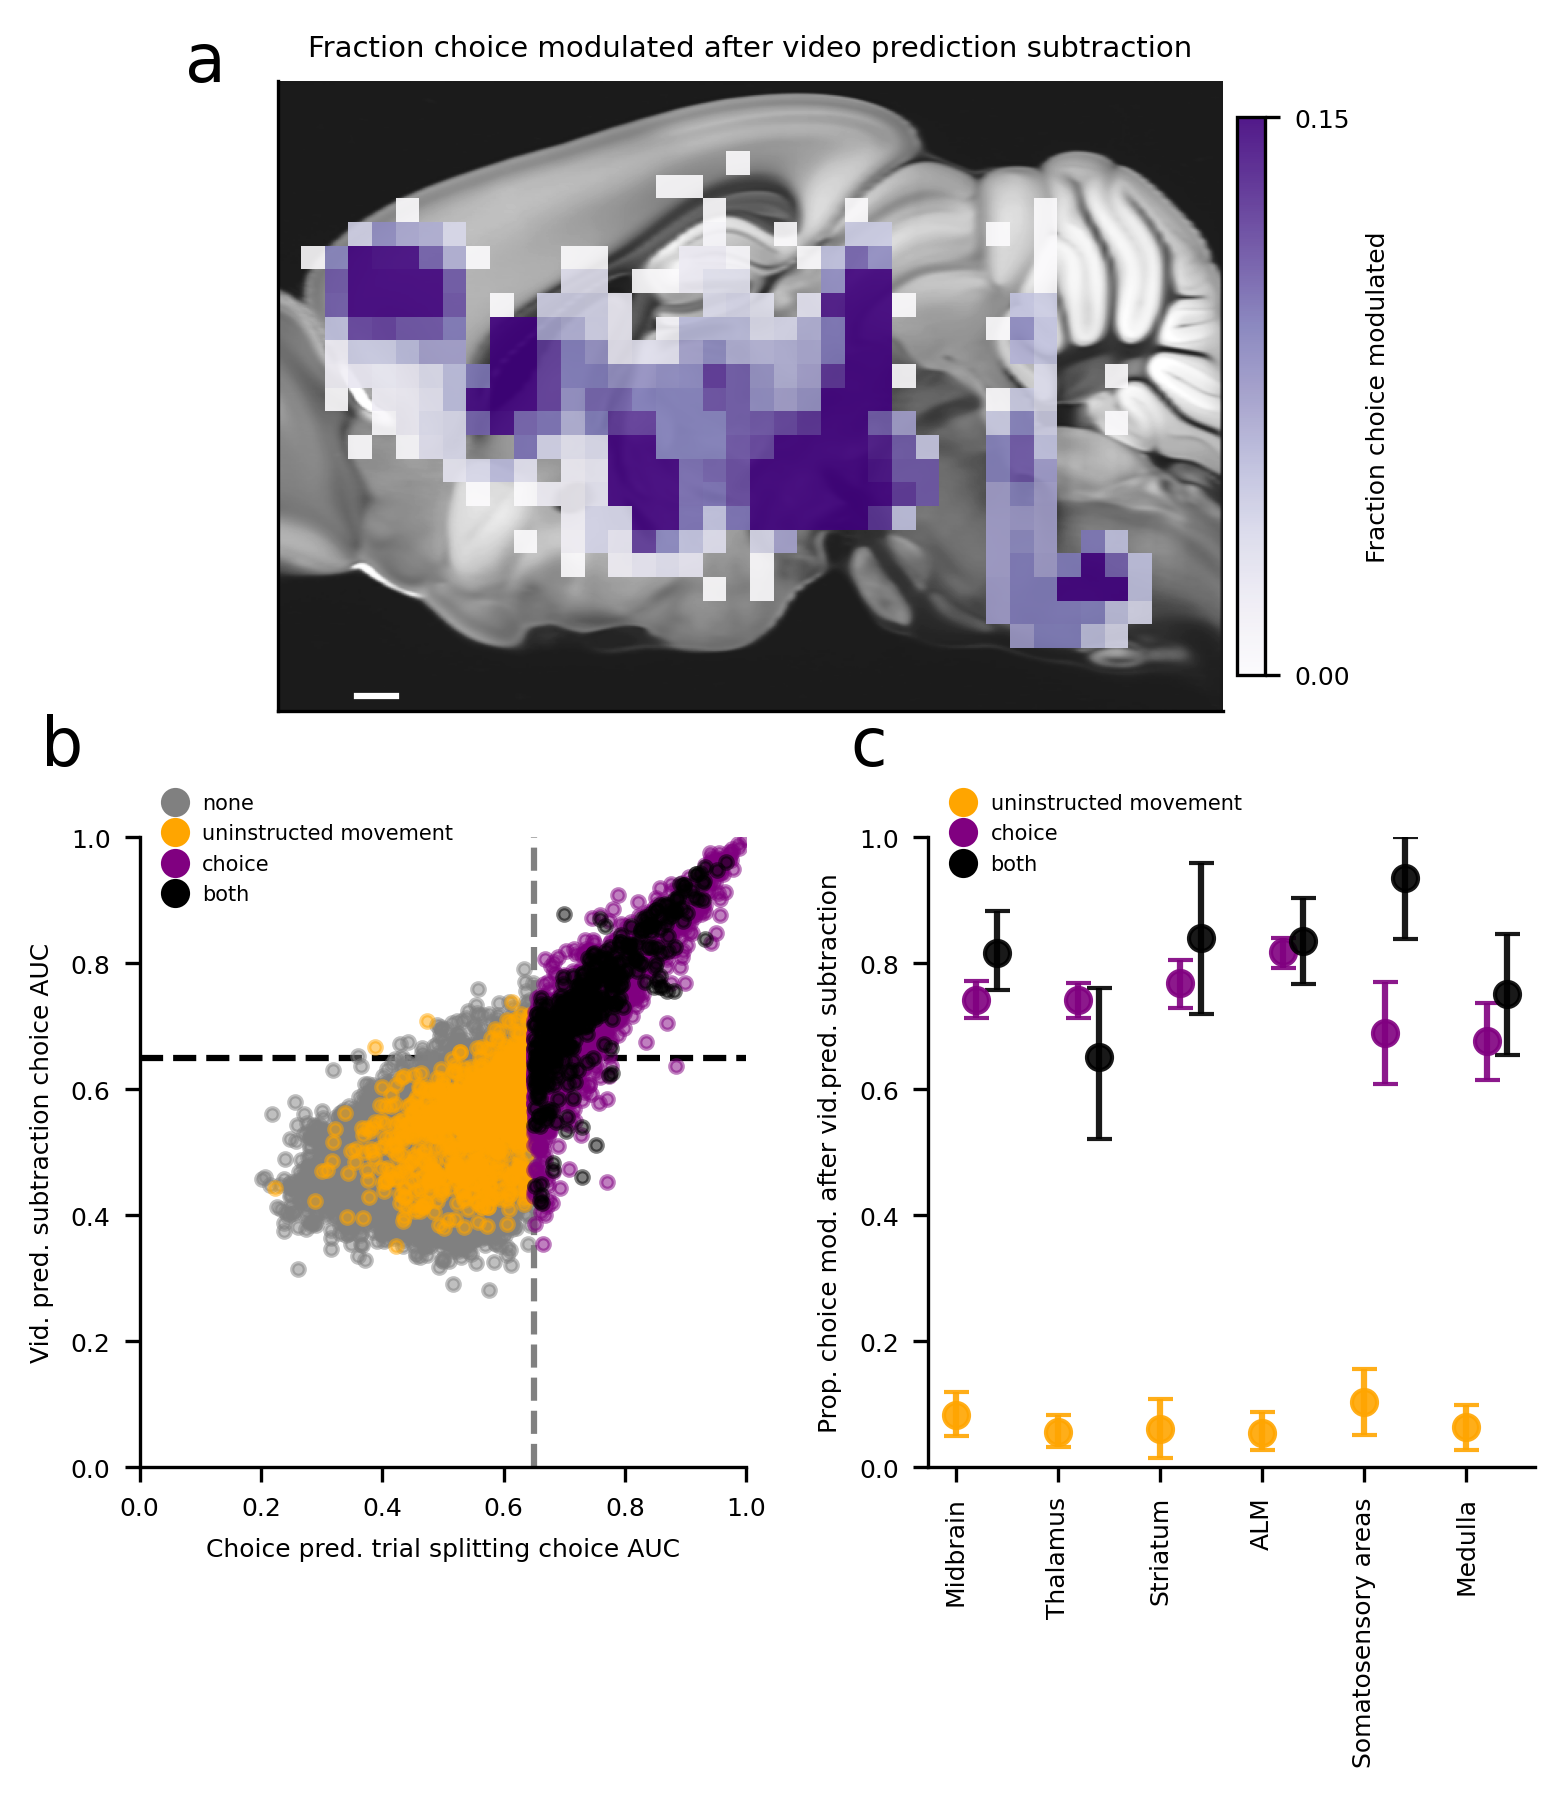

In [9]:
f = plt.figure(figsize = (6,6))
f.subplots_adjust(wspace = 0.3)
ax = f.add_subplot(2,1,1)
fig6.plot_saggital_heatmap(fig = f, ax= ax,cbar_x0_shift=-0.15, view = 'new choice auc fraction')
ax.set_position([
    ax.get_position().x0-0.15,
    ax.get_position().y0,
    ax.get_position().width,
    ax.get_position().height
])
ax.set_title('Fraction choice modulated after video prediction subtraction')


ax = f.add_subplot(2,2,3)
#ax.set_title('Comparison of AUCs')
ax.set_xlabel('Choice pred. trial splitting choice AUC')
ax.set_ylabel('Vid. pred. subtraction choice AUC')
ax.plot([0.65,0.65],[0,1],'--', color ='gray')
ax.plot([0,1],[0.65,0.65],'--', color ='k')
for i in [3,0,1,2]:
    ax.plot(fig6.auc_delay_data['trial_type_auc_test'][masks[i]], 
            fig6.selectivity_data['aligned_auc'][masks[i]], '.', 
            alpha = 0.5, color = cols[i], 
            )
for i in [3,0,1,2]:
    ax.plot([],[],'o',color = cols[i],
            label = ['uninstructed movement','choice','both','none',][i])
ax.legend(bbox_to_anchor=(0.01, 1.1), loc='upper left')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax = f.add_subplot(2,2,4)
n_bootstraps = 1000
#ax.set_title('Overlap of trial-split analysis and video removal analysis')
auc_cutoff = .65
ax.set_ylabel('Prop. choice mod. after vid.pred. subtraction')
ax.set_ylim(0,1)
for i,(k,v) in enumerate(area_inds.items()):
    for j in range(3):
        area_mask_inds = np.intersect1d(v, np.where(masks[j] == True)[0])
        bootstrap_fracs = []
        for _ in range(n_bootstraps):
            # Resample indices with replacement
            bootstrap_inds = np.random.choice(area_mask_inds, size=area_mask_inds.shape[0], replace=True)
            # Calculate frac for the bootstrap sample
            bootstrap_frac = np.sum(np.abs(fig6.selectivity_data['aligned_auc'][bootstrap_inds]) > auc_cutoff) / bootstrap_inds.shape[0]
            bootstrap_fracs.append(bootstrap_frac)

        # Convert to numpy array for easier manipulation
        bootstrap_fracs = np.array(bootstrap_fracs)

        # Calculate the mean and error bars (e.g., 95% confidence interval)
        frac_mean = np.mean(bootstrap_fracs)
        frac_lower = np.percentile(bootstrap_fracs, 5)  # Lower bound of 90% CI
        frac_upper = np.percentile(bootstrap_fracs, 95)  # Upper bound of 90% CI
        frac_error = frac_upper - frac_lower  # Symmetric error bars

        #frac = np.sum(np.abs(aligned_auc[area_mask_inds]) > auc_cutoff) / area_mask_inds.shape[0]
        #ax.plot(i+j*0.2, frac, 'o', alpha = 0.9, color = cols[j])
        ax.errorbar(i + j * 0.2, frac_mean, yerr=[[frac_mean - frac_lower], [frac_upper - frac_mean]], fmt='o', 
            alpha=0.9, color=cols[j], capsize=3)

ax.set_xticks(np.arange(len(area_inds.keys())))
ax.set_xticklabels(list(area_inds.keys()), rotation = 90)

for i in range(3):
    ax.plot([],[],'o',color = cols[i],label = ['uninstructed movement','choice','both'][i])

ax.legend(bbox_to_anchor=(0.01, 1.1), loc='upper left', framealpha=0)

f.text(0.15, 0.88, 'a', fontsize=16)
f.text(0.07, 0.5, 'b', fontsize=16)
f.text(0.52, 0.5, 'c', fontsize=16)
#plt.savefig('../figs/supplementary_figs/choice_auc_methods_comparison.pdf', dpi = 300, bbox_inches = 'tight')

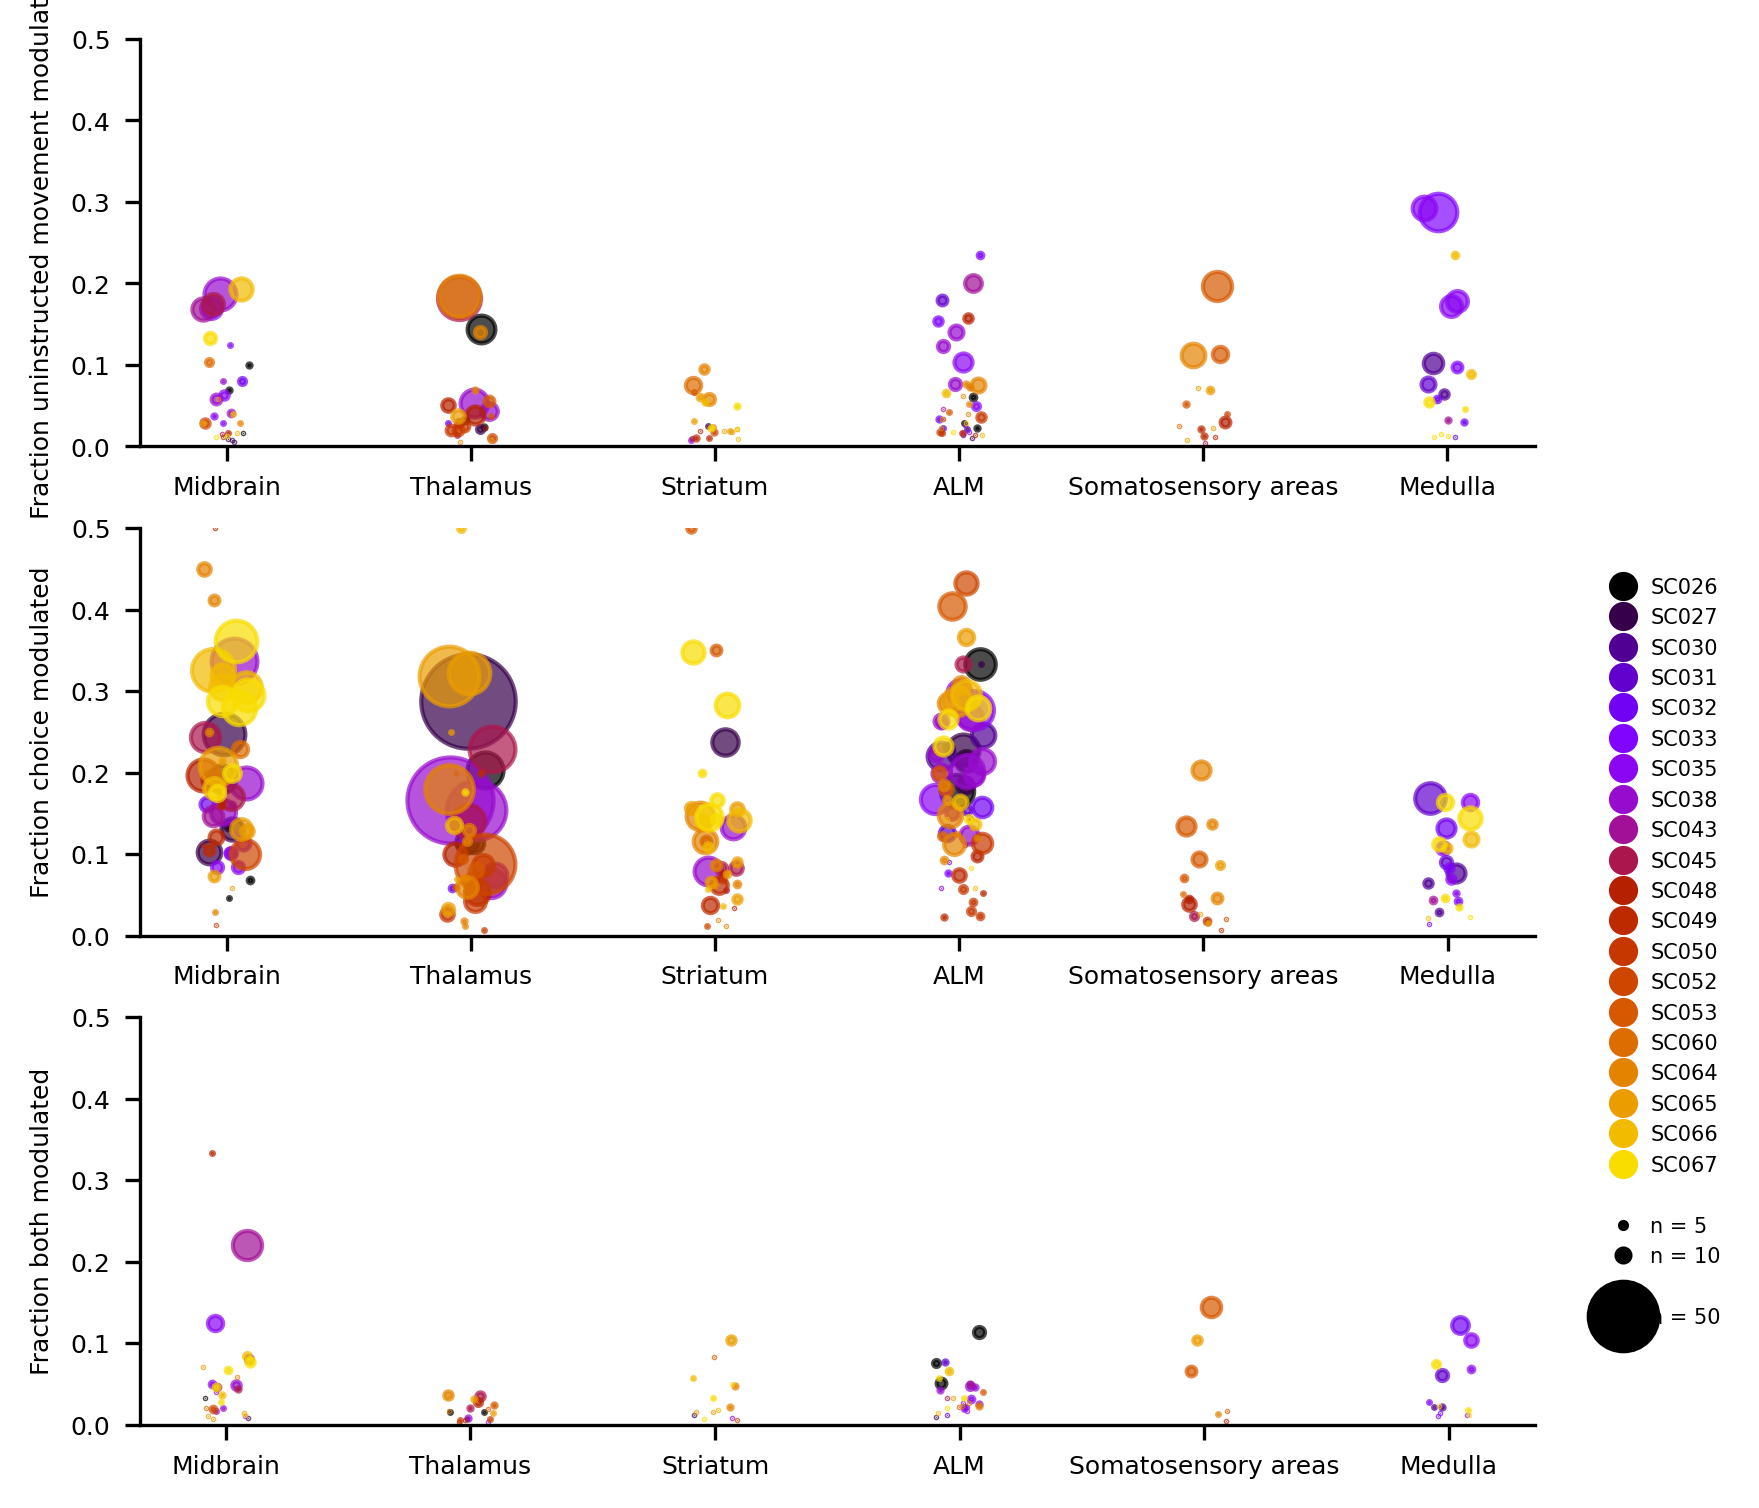

In [10]:
unique_sessions = np.unique(fig6.auc_delay_data['session_names'])
unique_animals = np.unique([session[:5] for session in unique_sessions])
sessions = np.array([session for session in fig6.auc_delay_data['session_names']])

plt.subplots(3,1, figsize = (6,6))
np.random.seed(0)
prev_animal = -1

titlestrs = ['']
for i, session in enumerate(unique_sessions):
    i_animal = np.where(unique_animals == session[:5])[0][0]
    fractions = [[] for _ in range(3)]
    area_type_numbers = [[] for _ in range(len(fig6.areas))]
    for j, area in enumerate(fig6.areas):
        _area_session_inds = np.intersect1d(area_inds[area], np.where(sessions == session)[0])
        for ii in range(3):
            _this_inds = np.intersect1d(_area_session_inds,np.where(masks[ii]== True)[0])
            if len(_area_session_inds) == 0:
                fractions[ii].append(np.nan)
                area_type_numbers[j].append(0)
            else:
                fractions[ii].append(len(_this_inds) / len(_area_session_inds))
                area_type_numbers[j].append(len(_this_inds))

    for ii in range(3):
        plt.subplot(3,1,ii+1)
        
        for jj in range(len(fig6.areas)):
            if area_type_numbers[jj][ii] > 0:
                plt.plot([jj+np.random.uniform(-0.1,0.1)], fractions[ii][jj], 'o', markersize = area_type_numbers[jj][ii]/3, color = plt.cm.gnuplot(i_animal/len(unique_animals)), alpha = 0.7)

    prev_animal = i_animal

labelnames = ['uninstructed movement','choice', 'both']
for ii in range(3):
    plt.subplot(3,1,ii+1)
    #plt.title(names[ii])
    plt.ylim([0,0.5])
    if ii == 0: 
        for i,animal in enumerate(unique_animals):
            plt.plot([],[], 'o', color = plt.cm.gnuplot(i/len(unique_animals)), label = animal)
        plt.plot([],[],' ', label =' ')
        for i in [5,10,50]:
            gap = '' if i < 100 else '   '
            plt.plot([],[], 'o', markersize = i/3, color = 'black', label = '%sn = %d'%(gap,i))
            if i > 5: plt.plot([],[],' ', label =' ')
            if i > 10: plt.plot([],[],' ', label =' ')
        plt.legend(bbox_to_anchor=(1.05, -0.3), loc='upper left', borderaxespad=0.)
    plt.xticks(range(len(fig6.areas)), fig6.areas, rotation = 0)
    plt.ylabel('Fraction %s modulated'%labelnames[ii])


#plt.savefig('../figs/reviewer_figures/AUC_single_session_fraction_linesplot.png', dpi = 300, bbox_inches = 'tight')

## Stats

In [11]:
ccf_coords = fig6.auc_delay_data['ccf_coords']
motor_auc = fig6.auc_delay_data['motor_type_auc_test']
trial_auc = fig6.auc_delay_data['trial_type_auc_test']


In [12]:
p_motor, f_motor, shuffle_motor = func.spatial_uniformity_test(motor_auc, ccf_coords, voxel_size = 500, n_shuffle = 1000, rng_seed = 0, return_raw_stats = True)

0.0


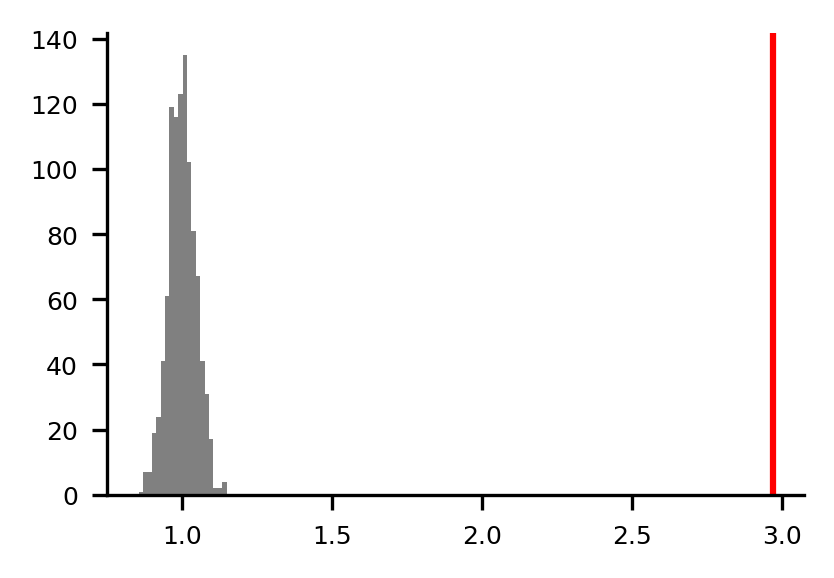

In [13]:
plt.figure(figsize = (3,2))
plt.hist(shuffle_motor, bins = 20, color = 'gray')
plt.axvline(f_motor, color = 'red')
print(p_motor)

In [22]:
p_trial, f_trial, shuffle_trial = func.spatial_uniformity_test(trial_auc, ccf_coords, voxel_size = 500, n_shuffle = 1000, rng_seed = 0, return_raw_stats = True)

0.0


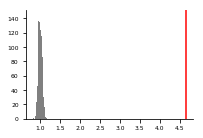

In [23]:
plt.figure(figsize = (3,2))
plt.hist(shuffle_trial, bins = 20, color = 'gray')
plt.axvline(f_trial, color = 'red')
print(p_trial)

In [24]:
p_diff, f_diff, shuffle_diff = func.spatial_uniformity_test(trial_auc - motor_auc, ccf_coords, voxel_size = 500, n_shuffle = 1000, rng_seed = 0, return_raw_stats = True)

0.0


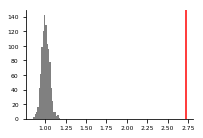

In [25]:
plt.figure(figsize = (3,2))
plt.hist(shuffle_diff, bins = 20, color = 'gray')
plt.axvline(f_diff, color = 'red')
print(p_diff)

In [26]:
fig6.get_medulla_alm_fraction_stats()

Medulla motor: 142, medulla trial: 171, both: 52, ratio: 1.20
ALM motor: 148, ALM trial: 710, ALM both: 73, ratio: 4.80
Midbrain motor: 159, Midbrain trial: 678, Midbrain both: 103, ratio: 4.26
Medulla vs ALM p-value:  5.842084549623147e-15
Medulla vs Midbrain p-value:  7.532714161666733e-13
Medulla vs ALM+Midbrain p-value:  3.5226972842126473e-19


### Nuo's question about choice AUC hotspot in Midbrain

Fields of Forel 7
Hypothalamus 7
Midbrain 49
Midbrain reticular nucleus 26
Pontine reticular nucleus 10
Posterior hypothalamic nucleus 4
Red nucleus 1
Subparafascicular area 1
Subparafascicular nucleus, magnocellular part 1
Substantia nigra, compact part 16
Substantia nigra, reticular part 88
Subthalamic nucleus 4
Ventral tegmental area 5
Zona incerta 20


(0.0, 1.0, 0.0, 1.0)

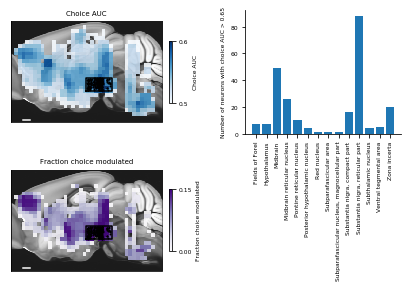

In [27]:
fig, axs = plt.subplots(2,2, figsize = (7,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.2)
axs = axs.flatten()
fig6.view_to_cmap['trial fraction'] = 'Purples'

ccf_labels, ccf_coords,_ = fig6._get_misc_arrays()
trial_type_auc = fig6.auc_delay_data['trial_type_auc_test']

high_auc_inds = np.where(trial_type_auc > 0.65)[0]
ccf_inds_of_interest = np.where((ccf_coords[:,2] > 7500) & (ccf_coords[:,2] < 9500) \
                              & (ccf_coords[:,1] > 4500) & (ccf_coords[:,1] < 5500))[0]

ccf_inds_of_interest = np.intersect1d(ccf_inds_of_interest, high_auc_inds)

fig6.plot_saggital_heatmap(fig = fig, ax = axs[0], 
                           view = 'trial average', 
                           cbar_x0_shift=0.01,
                           cbar_y0_shift=0.,
                           )
fig6.plot_saggital_heatmap(fig = fig, ax = axs[2], 
                           view = 'trial fraction', 
                           cbar_x0_shift=0.01,
                           cbar_y0_shift=0.,
                           )

for ax in [axs[0], axs[2]]:
    ax.plot([7500,7500,9500,9500,7500],[5500,4500,4500,5500,5500], 'k-')

    for i in range(len(ccf_inds_of_interest)):
        ax.plot(ccf_coords[ccf_inds_of_interest[i],2], ccf_coords[ccf_inds_of_interest[i],1], 'o', color = 'k', markersize = 1)  

ccf_labels_of_interest = ccf_labels[ccf_inds_of_interest]
unique_labels = np.unique(ccf_labels_of_interest)
label_counts = {}
for label in unique_labels:
    label_counts[label] = np.sum(ccf_labels_of_interest == label)
    print(label, label_counts[label])

axs[1].bar(label_counts.keys(), label_counts.values())
axs[1].set_xticklabels(label_counts.keys(), rotation = 90)
axs[1].set_ylabel('CCF label')
axs[1].set_ylabel('Number of neurons with choice AUC > 0.65')

axs[3].axis('off')

#plt.savefig('../figs/supplementary_figs/AUC_midbrain_hotspot.png', dpi = 300, bbox_inches = 'tight')


# Look at delay video pred AUC

In [14]:
FRAME_LIST_LONG = [-882,-877,-872,-867,-862,-857,-852,-847,-842,-837,-832,-827,-822,-817,-812,-807,-802,-797,-792,-787,-782,-777,-772,-767,-762,-757,-752,-747,-742,-737,-732,-727,-722,-717,-712,-707,-702,-697,-692,-687,-682,-677,-672,-667,-662,-657,-652,-647,-642,-637,-632,-627,-622,-617,-612,-607,-602,-597,-592,-587,-582,-577,-572,-567,-562,-557,-552,-547,-542,-537,-532,-527,-522,-517,-512,-507,-502,-497,-492,-487,-482,-477,-472,-467,-462,-457,-452,-447,-442,-437,-432,-427,-422,-417,-412,-407,-402,-397,-392,-387,-382,-377,-372,-367,-362,-357,-352,-347,-342,-337,-332,-327,-322,-317,-312,-307,-302,-297,-292,-287,-282,-277,-272,-267,-262,-257,-252,-247,-242,-237,-232,-227,-222,-217,-212,-207,-202,-197,-192,-187,-182,-177,-172,-167,-162,-157,-152,-147,-142,-137,-132,-127,-122,-117,-112,-107,-102,-97,-92,-87,-82,-77,-72,-67,-62,-57,-52,-47,-42,-37,-32,-27,-22,-17,-12,-7,-2,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,98,103,108,113,118,123,128,133,138,143,148,153,158,163,168,173,178,183,188,193,198,203,208,213,218,223,228,233,238,243,248,253,258,263,268,273,278,283,288,293,298,303,308,313,318,323,328,333,338,343,348,353]

FRAME_LIST = FRAME_LIST_LONG[8:-8]

frame_array = np.array(FRAME_LIST)
time_list = (frame_array*0.0034).tolist()

delay_mask = (np.array(time_list) > -1.2) * (np.array(time_list) < 0)

In [15]:
auc_data = pickle.load(open('../data/auc_analysis.pickle', 'rb'))
gh_info, sess_info, sess_info_marker, sub_gh_info = auc_data

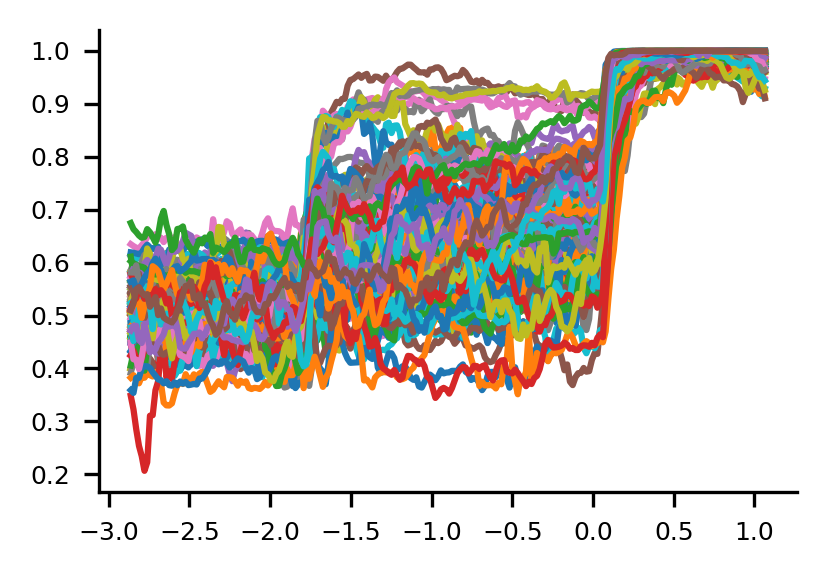

In [16]:
sessions = list(sess_info.keys())

plt.figure(figsize = (3,2))
for sess in sessions:
    plt.plot(time_list,sess_info[sess]['lick']['auc']['test'])

In [31]:
session_perf = pd.read_csv('../data/SessionPerf.csv')

In [32]:
session_to_delayAUC = {}

for sess in sessions:
    session_to_delayAUC[sess] = sess_info[sess]['lick']['auc']['test'][delay_mask == 1].mean()

In [33]:
session_to_performance = {}
for i in range(session_perf.shape[0]):
    session_to_performance[session_perf['Session Name'][i]] = session_perf['Performance'][i]

In [34]:
session_to_AUC_performance = {}

s38_counter = 4
for sess,perf in session_to_performance.items():
    short_sess = sess.split('_')[0] + '_' + sess.split('_')[1][4:] + sess.split('_')[1][2:4]
    if 'SC038' in short_sess:
        short_sess = short_sess + '_'+ str(s38_counter)
        s38_counter += 1
    if short_sess in session_to_delayAUC.keys():
        session_to_AUC_performance[short_sess] = [perf,session_to_delayAUC[short_sess]]

In [35]:
aucs = []
perfs = []
mice = []
for sess,perf_auc in session_to_AUC_performance.items():
    aucs.append(perf_auc[1])
    perfs.append(perf_auc[0])
    mice.append(sess.split('_')[0])

aucs = np.array(aucs)
perfs = np.array(perfs)
mice = np.array(mice)


Skipped SC031, too few sessions
Skipped SC052, too few sessions


Text(0,0.5,'Number of mice')

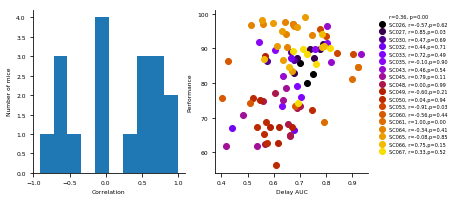

In [36]:
f, axs = plt.subplots(1, 2, figsize = (6,3))
axs = axs.flatten()


corr, p = stats.pearsonr(aucs, perfs)
axs[1].plot([],[], ' ', label = 'r=%.2f, p=%.2f'%(corr,p))
correlations = []
for i,mouse in enumerate(np.unique(mice)):
    inds = np.where(mice == mouse)[0]
    if len(inds) <= 2:
        print('Skipped %s, too few sessions'%mouse)
        continue
    correlation, p_value = stats.pearsonr(aucs[inds], perfs[inds])
    correlations.append(correlation)
    axs[1].plot(aucs[inds],perfs[inds], 'o', color = plt.cm.gnuplot(i/len(np.unique(mice))),  label = '%s, r=%.2f,p=%.2f'%(mouse,correlation,p_value))

axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_xlabel('Delay AUC')
axs[1].set_ylabel('Performance')

axs[0].hist(correlations, bins = 10)
axs[0].set_xlabel('Correlation')
axs[0].set_ylabel('Number of mice')

#plt.savefig('../figs/supplementary_figs/AUC_performance_correlation_v2.png', dpi = 300, bbox_inches = 'tight')

# Single neurons for response/stimulus tuning for supplementary figure

In [37]:
def plot_single_neuron_example(ax, data, colors = ['r','salmon','cornflowerblue','b'], lines = ['-','--','--','-'],auc = False):
    fr = data['fr']
    fr = fig6._get_moving_average(fr, window = 5)
    tt = data['tt']
    delay_mask = (tt > -1.2) * (tt < 0)
    trial_type_info = data['trial_type_info']['trial_labels']
    
    if auc :
        fr = fr[:,data['trial_type_info']['trial_inds']]
    for i,key in enumerate(trial_type_info.keys()):
        fr_sem = fr[delay_mask][:,trial_type_info[key]].std(axis=1)/np.sqrt(np.sum(trial_type_info[key]))
        ax.plot(tt[delay_mask], fr[delay_mask][:,trial_type_info[key]].mean(axis = 1), color = colors[i], linestyle = lines[i])
        ax.fill_between(tt[delay_mask], fr[delay_mask][:,trial_type_info[key]].mean(axis = 1)-fr_sem, fr[delay_mask][:,trial_type_info[key]].mean(axis = 1)+fr_sem, color = colors[i], alpha = 0.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Firing rate (Hz)')
    ax.set_xlim([-1.2,0.])

In [38]:
save_dict = pickle.load(open('../data/response_stimulus_example_neurons.pickle', 'rb'))

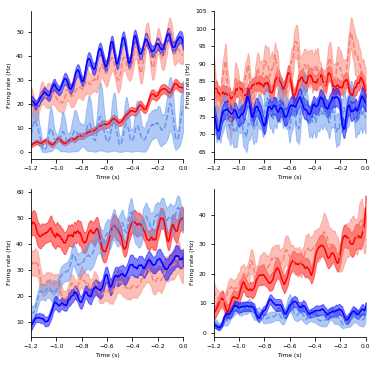

In [39]:
fig,axs = plt.subplots(2,2, figsize = (6,6))
axs = axs.flatten()

plot_single_neuron_example(axs[0], save_dict['response_example'][33])
plot_single_neuron_example(axs[1], save_dict['stimulus_example'][14])
plot_single_neuron_example(axs[2], fig6.example_neuron_data[7], auc = True)
plot_single_neuron_example(axs[3], fig6.example_neuron_data[8], auc = True)

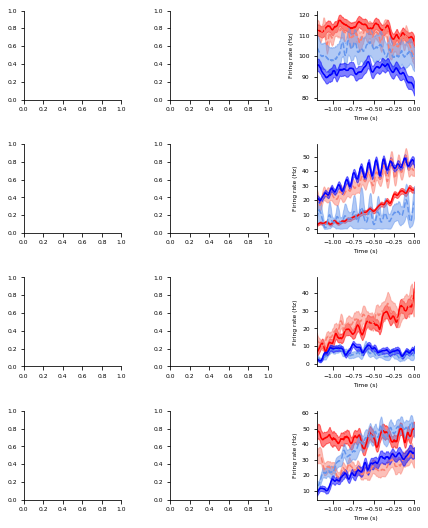

In [40]:
f,axs = plt.subplots(4,3, figsize = (7,9))
f.subplots_adjust(wspace = 0.5, hspace = 0.5)

plot_single_neuron_example(axs[1][2], save_dict['response_example'][33])
plot_single_neuron_example(axs[0][2], save_dict['stimulus_example'][6])
plot_single_neuron_example(axs[3][2], fig6.example_neuron_data[7], auc = True)
plot_single_neuron_example(axs[2][2], fig6.example_neuron_data[8], auc = True)

#plt.savefig('../figs/supplementary_figs/single_neuron_examples_for_auc_cartoon.pdf', dpi = 300, bbox_inches = 'tight')

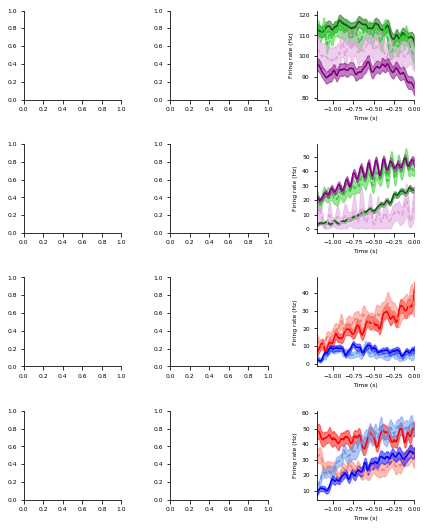

In [41]:
f,axs = plt.subplots(4,3, figsize = (7,9))
f.subplots_adjust(wspace = 0.5, hspace = 0.5)
response_stim_colors = ['darkgreen', 'limegreen','plum','purple']

plot_single_neuron_example(axs[1][2], save_dict['response_example'][33], colors = response_stim_colors)
plot_single_neuron_example(axs[0][2], save_dict['stimulus_example'][6], colors = response_stim_colors)
plot_single_neuron_example(axs[3][2], fig6.example_neuron_data[7], auc = True)
plot_single_neuron_example(axs[2][2], fig6.example_neuron_data[8], auc = True)

#plt.savefig('../figs/supplementary_figs/single_neuron_examples_for_auc_cartoon_correctcolors.pdf', dpi = 300, bbox_inches = 'tight')

# Ratio of choice vs uninstructed movement modulated neurons as function of session AUC cutoff

In [4]:
FRAME_LIST_LONG = [-882,-877,-872,-867,-862,-857,-852,-847,-842,-837,-832,-827,-822,-817,-812,-807,-802,-797,-792,-787,-782,-777,-772,-767,-762,-757,-752,-747,-742,-737,-732,-727,-722,-717,-712,-707,-702,-697,-692,-687,-682,-677,-672,-667,-662,-657,-652,-647,-642,-637,-632,-627,-622,-617,-612,-607,-602,-597,-592,-587,-582,-577,-572,-567,-562,-557,-552,-547,-542,-537,-532,-527,-522,-517,-512,-507,-502,-497,-492,-487,-482,-477,-472,-467,-462,-457,-452,-447,-442,-437,-432,-427,-422,-417,-412,-407,-402,-397,-392,-387,-382,-377,-372,-367,-362,-357,-352,-347,-342,-337,-332,-327,-322,-317,-312,-307,-302,-297,-292,-287,-282,-277,-272,-267,-262,-257,-252,-247,-242,-237,-232,-227,-222,-217,-212,-207,-202,-197,-192,-187,-182,-177,-172,-167,-162,-157,-152,-147,-142,-137,-132,-127,-122,-117,-112,-107,-102,-97,-92,-87,-82,-77,-72,-67,-62,-57,-52,-47,-42,-37,-32,-27,-22,-17,-12,-7,-2,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,98,103,108,113,118,123,128,133,138,143,148,153,158,163,168,173,178,183,188,193,198,203,208,213,218,223,228,233,238,243,248,253,258,263,268,273,278,283,288,293,298,303,308,313,318,323,328,333,338,343,348,353]

FRAME_LIST = FRAME_LIST_LONG[8:-8]

frame_array = np.array(FRAME_LIST)
time_list = (frame_array*0.0034).tolist()

delay_mask = (np.array(time_list) > -1.2) * (np.array(time_list) < 0)

auc_data = pickle.load(open('../data/auc_analysis.pickle', 'rb'))
gh_info, sess_info, sess_info_marker, sub_gh_info = auc_data

sessions = list(sess_info.keys())
session_to_delayAUC = {}

for sess in sessions:
    session_to_delayAUC[sess] = sess_info[sess]['lick']['auc']['test'][delay_mask == 1].mean()

In [5]:
motor_mask, trial_mask, both_mask, none_mask = fig6._get_auc_type_masks()
auc_sessions = fig6.auc_delay_data['session_names']

In [6]:
unique_sessions = np.unique(auc_sessions)
longsess_to_delayAUC = {}

for sess in unique_sessions:
    shortsess = sess.split('_')[0] + '_' + sess.split('_')[1][4:] + sess.split('_')[1][2:4]
    if shortsess in session_to_delayAUC.keys():
        longsess_to_delayAUC[sess] = session_to_delayAUC[shortsess]
    else:
        shortsess += "_s%s"%sess.split('_')[-1]
        longsess_to_delayAUC[sess] = session_to_delayAUC[shortsess]


In [7]:
ccfs, coords, alm_inds = fig6._get_misc_arrays()
area_inds = {area: func.get_single_area_inds(area, fig6.allen_hierarchy, ccfs, alm_inds) for area in fig6.areas}

In [8]:
auc_limits = [0,0.65,0.7,0.75,]
video_auc_array = np.zeros(len(auc_sessions))
for sess,auc in longsess_to_delayAUC.items():
    video_auc_array[np.where(auc_sessions == sess)[0]] = auc


In [9]:
video_auc_array = np.array(video_auc_array) 

In [10]:
os.makedirs('../figs/reviewer_figs/', exist_ok = True)

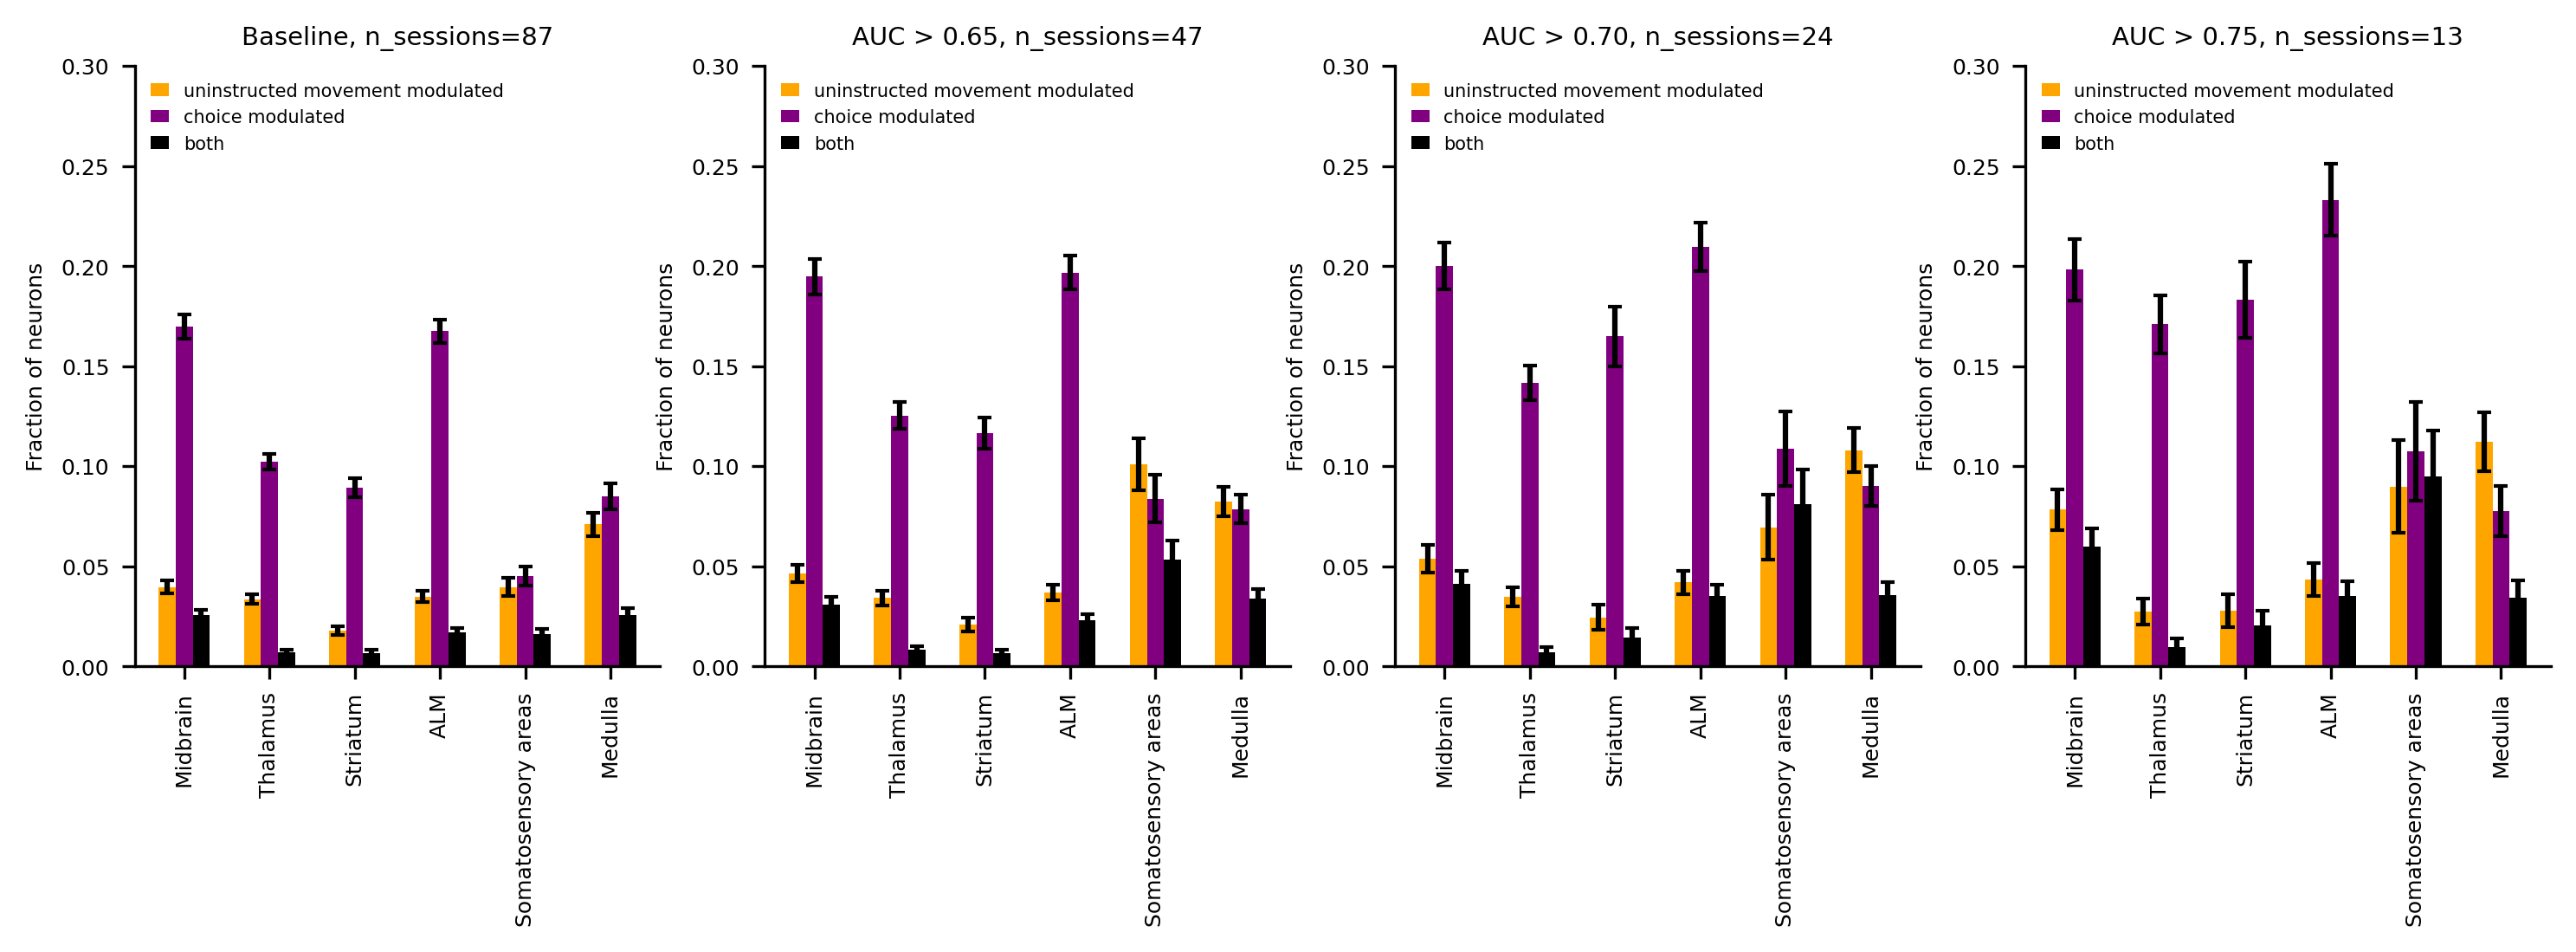

In [18]:
f, axs = plt.subplots(1,4, figsize = (12,3))
axs = axs.flatten()

midbrain_fractions = []
alm_fractions = []
medulla_fractions = []
midbrain_std =[]
alm_std = []
medulla_std = []

for i in range(4):
    ax = axs[i]
    session_inds = np.where((video_auc_array > auc_limits[i]))[0]
    nsess = np.sum(np.array(list(longsess_to_delayAUC.values())) > auc_limits[i])
    limited_area_inds= {area:np.intersect1d(area_inds[area],session_inds) for area in fig6.areas}
    means, stds, names = fig6._bootstrap_fractions(limited_area_inds, cutoff = 0.65, bootstrap_n = 1000)

    midbrain_fractions.append(means[1][0]/means[0][0])
    alm_fractions.append(means[1][3]/means[0][3])
    medulla_fractions.append(means[1][5]/means[0][5])

    midbrain_std.append(means[1][0]/means[0][0]*np.sqrt((stds[0][0]/means[0][0])**2 +(stds[1][0]/means[1][0])**2))
    alm_std.append(means[1][3]/means[0][3]*np.sqrt((stds[0][3]/means[0][3])**2 +(stds[1][3]/means[1][3])**2))
    medulla_std.append(means[1][5]/means[0][5]*np.sqrt((stds[0][5]/means[0][5])**2 +(stds[1][5]/means[1][5])**2))

    ax.bar(np.arange(len(area_inds.keys()))-0.2, means[0], yerr = stds[0], capsize = 2,width = 0.2, color = 'orange', label = 'uninstructed movement modulated',)
    ax.bar(np.arange(len(area_inds.keys())), means[1], yerr = stds[1], capsize = 2,width = 0.2, color = 'purple', label = 'choice modulated',)
    ax.bar(np.arange(len(area_inds.keys()))+0.2, means[2], yerr = stds[2], capsize = 2,width = 0.2, color = 'black', label = 'both',)

    ax.set_xticks(np.arange(len(area_inds.keys())))
    ax.set_xticklabels(area_inds.keys(), rotation = 90)
    ax.set_ylabel('Fraction of neurons')
    ax.legend(loc = 'upper left')
    ax.set_ylim(0,0.30)
    titlestr = 'AUC > %.2f, n_sessions=%d'%(auc_limits[i],nsess) if i > 0 else 'Baseline, n_sessions=%d'%nsess
    ax.set_title(titlestr)

plt.savefig('../figs/reviewer_figs/AUC_modulation_fraction_by_area_cutoffsweep.png', dpi = 300, bbox_inches = 'tight')

In [26]:
motor_counts = []
trial_counts = []

for i in range(4):
    session_inds = np.where((video_auc_array > auc_limits[i]))[0]
    nsess = np.sum(np.array(list(longsess_to_delayAUC.values())) > auc_limits[i])
    limited_area_inds= {area:np.intersect1d(area_inds[area],session_inds) for area in fig6.areas}
    motor_mask, trial_mask, both_mask, none_mask = fig6._get_auc_type_masks(cutoff = 0.65)
    # get Medulla, Midbrain and ALM counts
    for area in ['Medulla','ALM','Midbrain']:
        motor_counts.append(np.sum(motor_mask[limited_area_inds[area]]))
        trial_counts.append(np.sum(trial_mask[limited_area_inds[area]]))




In [49]:
def perform_pairwise_stats(motor_counts, trial_counts):
    """
    Performs pairwise binomial tests between areas
    Returns p-values for medulla vs ALM and medulla vs midbrain
    """
    medulla_motor, alm_motor, midbrain_motor = motor_counts
    medulla_trial, alm_trial, midbrain_trial = trial_counts
    
    # Medulla vs ALM
    p_value_alm = stats.binom_test(
        medulla_trial,
        medulla_motor + medulla_trial,
        (medulla_trial + alm_trial)/(medulla_motor + medulla_trial + alm_motor + alm_trial),
        alternative='two-sided') * 2  # Bonferroni correction
    
    # Medulla vs Midbrain
    p_value_midbrain = stats.binom_test(
        medulla_trial,
        medulla_motor + medulla_trial,
        (medulla_trial + midbrain_trial)/(medulla_motor + medulla_trial + midbrain_motor + midbrain_trial),
        alternative='two-sided') * 2  # Bonferroni correction
    
    return p_value_alm, p_value_midbrain

def get_significance_from_p_value(p):
    """
    Returns significance level based on p-value
    """
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

def add_significance_markers(ax, x_pos, p_value, y_start, height=0.05, width=0.15, plot_significance=True):
    """
    Adds significance markers (*) based on p-value
    """
    marker = get_significance_from_p_value(p_value)
        
    # Draw the significance bar
    ax.plot([x_pos-width, x_pos+width], [y_start, y_start], 'k-', linewidth=1)
    if plot_significance: ax.text(x_pos, y_start + 0.002, marker, ha='center', va='bottom')

/tmp/ipykernel_514852/2821700952.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_alm = stats.binom_test(
/tmp/ipykernel_514852/2821700952.py:17: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_midbrain = stats.binom_test(


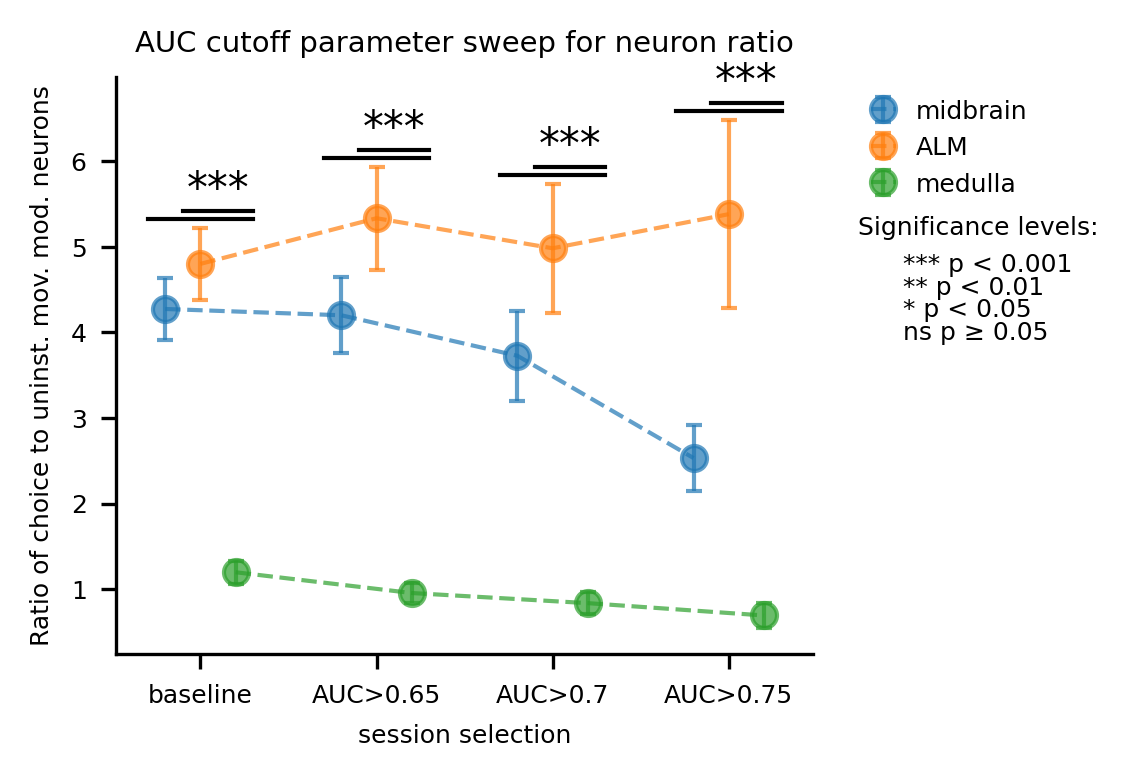

In [70]:
plt.figure(figsize = (3,2.5))
plt.errorbar(x=np.arange(4)-0.2,y=midbrain_fractions,yerr=midbrain_std, label = 'midbrain',capsize = 2, marker = 'o', alpha = 0.7, linestyle = '--', lw = 1)
plt.errorbar(x=np.arange(4),y=alm_fractions, yerr =alm_std, label = 'ALM',capsize = 2, marker = 'o',alpha = 0.7, linestyle = '--', lw = 1)
plt.errorbar(x=np.arange(4)+0.2,y=medulla_fractions, yerr=medulla_std, label = 'medulla', capsize = 2, marker = 'o',alpha = 0.7, linestyle = '--', lw = 1)
for i in range(4):
    p_value_alm, p_value_midbrain = perform_pairwise_stats(motor_counts[i*3:(i+1)*3], trial_counts[i*3:(i+1)*3])
    add_significance_markers(plt.gca(), i+0.1, p_value_alm, 
                             y_start = 0.2 + alm_fractions[i]+alm_std[i], width = 0.2,
                             )
    add_significance_markers(plt.gca(), i, p_value_midbrain, 
                             y_start = 0.1 + alm_fractions[i]+alm_std[i],  width = 0.3,
                             plot_significance=((get_significance_from_p_value(p_value_midbrain) == get_significance_from_p_value(p_value_alm)) == False))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 6)

# Add significance explanation text
plt.figtext(0.95, 0.67, 'Significance levels:', fontsize=6)
plt.figtext(1.0, 0.62, '*** p < 0.001', fontsize=6)
plt.figtext(1.0, 0.59, '** p < 0.01', fontsize=6)
plt.figtext(1.0, 0.56, '* p < 0.05', fontsize=6)
plt.figtext(1.0, 0.53, 'ns p ≥ 0.05', fontsize=6)


plt.xticks(np.arange(4),['baseline','AUC>0.65','AUC>0.7','AUC>0.75'])
plt.ylabel('Ratio of choice to uninst. mov. mod. neurons')
plt.xlabel('session selection')
plt.title('AUC cutoff parameter sweep for neuron ratio')
plt.savefig('../figs/reviewer_figs/AUC_modulation_ratio_by_area_cutoffsweep_wstats.png', dpi = 300, bbox_inches = 'tight')
